# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Brief description

- Determine factors associated with vehicle price in a collection of advertisements. We wil use a file cataloging the free vehicle advertisements for Crankshaft List over the last few years. 
- File path: /datasets/vehicles_us.csv.

### Project plan
- Open the data file and study the general information.
    - Write general observations and identify potential areas for further investigation.
    - Summarize observations in [Introductory conclusion section](#general_overview_conclusion).

- Data preprocesing
    - Identify and study missing values. Fill in as appropriate.
    - Study data types. Change data types where needed.
    - Write general observations, hypotheses for anamolies, and rationale for decisions.
    - Summarize observations in [Data preprocessing conclusion section](#data_preprocessing_conclusion).
   
- Make calculations and add them to the table
    - Day of the week, month, and year the ad was placed.
    - The vehicle's age (in years) when the ad was placed.
    - The vehicle's average mileage per year.
    - In the condition column, replace string values with a numeric scale.
        - new = 5
        - like new = 4
        - excellent = 3
        - good = 2
        - fair = 1
        - salvage = 0
    - Summarize actions taken and rationales in [Calculations conclusion section](#calculations_conclusion).
    
- Carry out exploratory data analysis
    - Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.
    - Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.
    - Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.
    - Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.
    - Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.
    - What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.
    - Write general observations and identify potential areas for further investigation.
    - Summarize observations in [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion).
    
- Overall conclusion
    - Summarize conclusions and offer recommendations in [Overall conclusion](#conclusion).
    
<a class="anchor" id="table_of_contents"></a>
### Table of Contents

* 1 [Open the data file and study the general information](#general_overview)
    * 1.1 [Introductory conclusion section](#general_overview_conclusion)
* 2 [Data preprocessing](#data_preprocessing)
    * 2.1 [Data preprocessing conclusion section](#data_preprocessing_conclusion)
* 3 [Make calculations and add them to the table](#calculations)
    * 3.1 [Calculations conclusion section](#calculations_conclusion)
* 4 [Carry out exploratory data analysis](#exploratory_data_analysis)
    * 4.1 [Exploratory data analysis conclusion section](#exploratory_data_analysis_conclusion)
* 5 [Overall conclusion](#conclusion)

<a class="anchor" id="general_overview"></a>
## Open the data file and study the general information

In [1]:
# import libraries
import pandas as pd
import numpy as np # for changing data types str to int
import matplotlib.pyplot as plt

In [2]:
# load the data
try:
    df = pd.read_csv('/Users/rraven/Desktop/a_final_yandex/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

# print the first 5 rows
print('\nFirst 5 rows of vehicles_us.csv')
df.head()


First 5 rows of vehicles_us.csv


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
# print the last 5 rows
print('\nLast 5 rows of vehicles_us.csv')
df.tail()


Last 5 rows of vehicles_us.csv


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


The vehicles_us dataframe has 13 columns covering aspects of vehicles. Several NaN values are noted.

In [4]:
# print the general info
print('\nGeneral info of vehicles_us.csv\n')
df.info()


General info of vehicles_us.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print composition of data types
print('Composition of data types')
df.dtypes.value_counts()

Composition of data types


object     7
float64    4
int64      2
dtype: int64

In [6]:
# print size of dataset (just the number of rows and columns)
print('rows, columns\n')
print(df.shape)

rows, columns

(51525, 13)


There are 51525 total rows and 13 columns, but several columns (model_year, cylinders, odometer, paint_color, and is_4wd) are missing values. There are 7 object data types, 4 float64, and 2 int64. The data type will need to be changed to int for model_year (float64), and cylinders (float64), odometer (float64). 
is_4wd needs to be investigated further. Maybe it should be a boolean?
date_posted needs to be converted to a datetime datatype.

In [7]:
# print sum of missing values per column
print('Column\t\tNumber missing values\n')
print(df.isnull().sum()) 

Column		Number missing values

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [8]:
# check data for duplicates in entire dataFrame
print('Number of duplicate rows:')
df.duplicated().sum()

Number of duplicate rows:


0

In [9]:
# check general statistics for dataFrame
print('Statistics')
df.describe()

Statistics


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<a class="anchor" id="general_overview_conclusion"></a>
### Introductory Conclusion

We've been given the file vehicles_us.csv to determine what factors influence the price of a vehicle. Vehicles_us.csv contains the following fields:

    price
    model_year
    model
    condition
    cylinders
    fuel — gas, diesel, etc.
    odometer — the vehicle's mileage when the ad was published
    transmission
    paint_color
    is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
    date_posted — the date the ad was published
    days_listed — from publication to removal
    
There are 51525 total rows and 13 columns.

There are several missing values to investigate in 5 columns: 
model_year, cylinders, odometer, paint_color, and is_4wd.

Several issues with data type will need to be addressed: for model_year (float64), and cylinders (float64), odometer (float64) should be integers. 

date_posted needs to be converted to a datetime datatype.

is_4wd needs to be investigated further. Shouldn't it be a boolean? 

There are no duplicate rows.


[Return to table of contents](#table_of_contents)

<a class="anchor" id="data_preprocessing"></a>
## Data preprocessing

- Data preprocesing
    - Identify and study missing values. Fill in as appropriate.
    - Study data types. Change data types where needed.
    - Write general observations, hypotheses for anamolies, and rationale for decisions.
    - Summarize observations in [Data preprocessing conclusion section](#data_preprocessing_conclusion).
    
First we will address the missing values in model_years, cylinders, odometer, paint_color, and is_4wd.

We have several columns with no missing values (model, condition, fuel, transmission, type, date_posted, and date_listed). Some of these may demonstrate relationships with the columns where values are missing and those should be considered when filling in missing values.

In [10]:
# investigate missing values
ratio = 100 * df.isnull().sum() / len(df)
print('Table of missing values\nColumn\t\tPercent Missing')
ratio

Table of missing values
Column		Percent Missing


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

There are 5 columns with missing values, between 7% and 50%. First we will look at model_year.

In [11]:
# investigate model_year stats
print('model_year stats')
original_model_year_mean = df['model_year'].mean()
df['model_year'].describe()

model_year stats


count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [12]:
# investigate stats on model_year column
print('model_year unique values')
df['model_year'].nunique()

model_year unique values


68

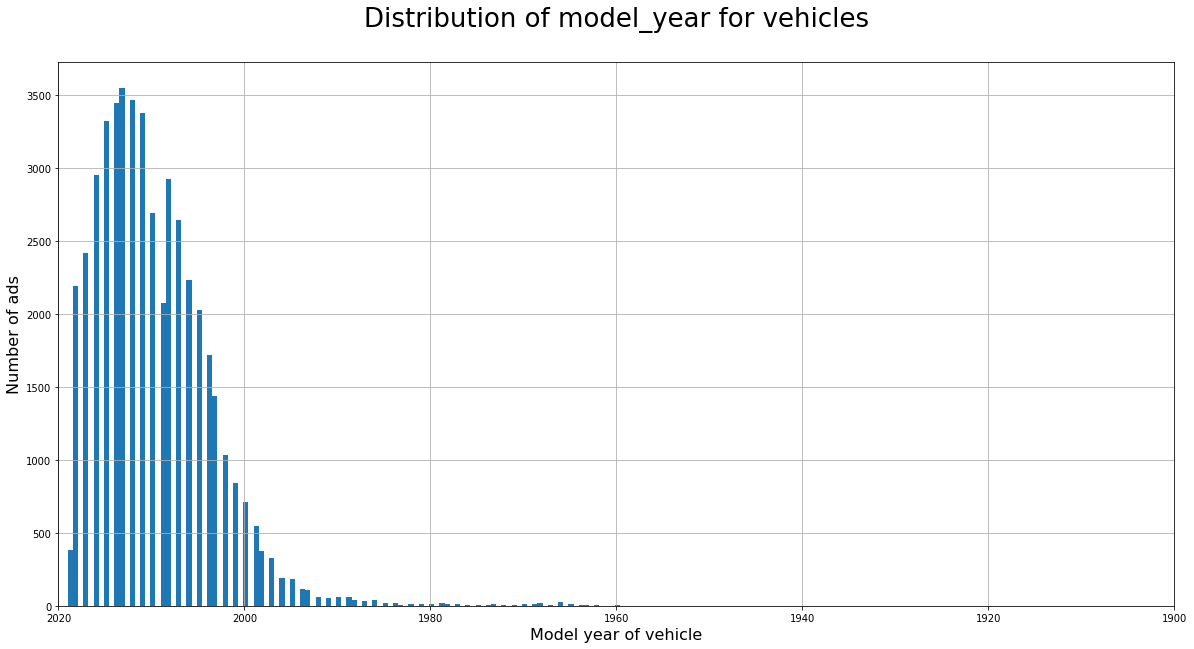

In [13]:
# histogram of frequency of listings by model year
df['model_year'].hist(bins=200, figsize=(20,10))
plt.title('Distribution of model_year for vehicles\n', fontsize=26)
plt.xlim(2020, 1900)
plt.ylabel('Number of ads', fontsize=16)
plt.xlabel('Model year of vehicle', fontsize=16)
plt.show()

Over 7% of the model_year column is missing values. model_year has 68 unique model years and vehicles range in year from 1908 to 2019. The Ford Model T was produced in 1908 so that may be a real advertisement, not a mistake. Still it is a flag to explore further in exploratory data analysis.

At this point we will look for any relationships to help us fill in missing model_year values. There are potential relationships between model_year and other columns. We suspect model, condition, and type will help us fill in the missing values. We will use the median values because the outlying lower values are skewing the mean downward.

In [14]:
# check for model_year depending on condition
print('model_year depending on condition.')
model_year_by_condition = df.pivot_table(index='condition', values='model_year', aggfunc='count')
model_year_by_condition.sort_values('model_year', ascending=False)

model_year depending on condition.


,model_year
condition,
excellent,23074
good,18695
like new,4409
fair,1492
new,133
salvage,103


In [15]:
# check for model_year depending on model
print('model_year depending on model.')
model_year_by_model = df.pivot_table(index='model', values='model_year', aggfunc='count')
model_year_by_model

model_year depending on model.


,model_year
model,
acura tl,224
bmw x5,246
buick enclave,257
cadillac escalade,295
chevrolet camaro,392
...,...
toyota sienna,308
toyota tacoma,769
toyota tundra,568


In [16]:
# check for model_year depending on type
print('model_year depending on type.')
model_year_by_type = df.pivot_table(index='type', values='model_year', aggfunc='count')
model_year_by_type.sort_values('model_year', ascending=False)

model_year depending on type.


,model_year
type,
truck,11517
SUV,11486
sedan,11306
pickup,6484
coupe,2158
wagon,1431
mini-van,1075
hatchback,974
van,594


With these three columns (condition, model, and type) we can fill in missing values with an educated guess.  

As an experiment, we will also make a copy and fill in missing values with only 2011 (the median) to see how the stats compare.

In [17]:
# make a copy of the df for df_2011_model_year
df_2011_model_year = df.copy()

# fill in missing values with median model year
print('Fill in missing values with median model_year, 2011.')
median_model_year = df_2011_model_year['model_year'].median()
df_2011_model_year['model_year'].fillna(value=median_model_year, inplace = True)

print('Verify there are no longer any missing values in model_year of df_2011_model_year.')
df_2011_model_year['model_year'].isnull().sum()

Fill in missing values with median model_year, 2011.
Verify there are no longer any missing values in model_year of df_2011_model_year.


0

In [18]:
# fill in values using condition, model, and type
print('Fill in missing values of model_year based on condition, model, and type.')
df['model_year'] = df['model_year'].fillna(df.groupby(['condition', 'model', 'type'])['model_year'].transform('median'))

# df['model_year'] = df.groupby(['condition', 'model', 'type'])['model_year'].transform(lambda x: x.fillna(x.median()))
# above also works, but it throws a warning message

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in model_year')
df['model_year'].isnull().sum()

Fill in missing values of model_year based on condition, model, and type.
Verify that there are no missing values in model_year


27

In [19]:
# investigate the rows still missing values
print('List of rows still missing values.')
df[df['model_year'].isna()].head(30)

List of rows still missing values.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2384,6000,NaN,ford mustang,like new,NaN,gas,170000.0,manual,hatchback,blue,NaN,2018-10-04,33
3024,4300,NaN,hyundai sonata,excellent,4.0,gas,95000.0,automatic,SUV,NaN,NaN,2018-10-02,61
4327,1500,NaN,honda civic,fair,4.0,gas,NaN,manual,hatchback,blue,NaN,2019-02-24,40
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
13089,1800,NaN,ram 1500,good,6.0,gas,182000.0,automatic,wagon,white,NaN,2018-09-18,2
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
19194,4250,NaN,chevrolet silverado,good,8.0,gas,164000.0,automatic,van,red,NaN,2019-03-04,13
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
21759,6950,NaN,honda cr-v,excellent,4.0,gas,83000.0,automatic,convertible,black,1.0,2019-03-18,46


We still have 27 rows with missing model_year. This is because some combinations of condition, model, and type are not associated with a model year, therefore there is no model year to insert. 

We will attempt to replace the remaining rows by using only 2 of the variables at a time (condition and model), (condition and type), and/or (model and type) to fill in the missing values.

In [20]:
# fill in values using condition and model
print('Fill in missing values of model_year based on condition and model.')
df['model_year'] = df['model_year'].fillna(df.groupby(['condition', 'model'])['model_year'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in model_year')
df['model_year'].isnull().sum()

Fill in missing values of model_year based on condition and model.
Verify that there are no missing values in model_year


6

In [21]:
# fill in values using condition and type
print('Fill in missing values of model_year based on condition and type.')
df['model_year'] = df['model_year'].fillna(df.groupby(['condition', 'type'])['model_year'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in model_year')
df['model_year'].isnull().sum()

Fill in missing values of model_year based on condition and type.
Verify that there are no missing values in model_year


0

In [22]:
# print the stats of the copy df where we replaced the model_year with 2011
print('Stats for copy where missing values filled in with 2011.')
all_2011_model_year_mean = df_2011_model_year['model_year'].mean()
df_2011_model_year['model_year'].describe()

Stats for copy where missing values filled in with 2011.


count    51525.000000
mean      2009.838234
std          6.065836
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [23]:
# print the stats of the df where we replaced the model_year based on condition, type, model
print('Stats for df where we replaced model_year based on condition, type, model.')
conditions_model_year_mean = df['model_year'].mean()
df['model_year'].describe()

Stats for df where we replaced model_year based on condition, type, model.


count    51525.000000
mean      2009.786356
std          6.139625
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [24]:
# calculate the percent difference in mean between approaches
pct = abs(((conditions_model_year_mean - all_2011_model_year_mean)/ \
           ((conditions_model_year_mean + all_2011_model_year_mean)/2)*100))
# Percentage difference = Absolute difference / Average x 100
print('Percent difference between calculated means of 2 approaches:', (pct))
print('\nWe\'ve verified that we\'ve filled in the missing values of model_year using the influence of median values of combinations of condition, model, and type.') 
print('The mean changed from', original_model_year_mean, 'to', conditions_model_year_mean)    
print('\nAs an aside, this comparison demonstrates replacing values based on the median produces different results compared to replacing values based on associated variables. The change in mean (all_2011_model_year_mean vs conditions_model_year_mean) may be a small difference, but in a huge dataset it could make a big difference in analysis.')

Percent difference between calculated means of 2 approaches: 0.0025812226040580113

We've verified that we've filled in the missing values of model_year using the influence of median values of combinations of condition, model, and type.
The mean changed from 2009.75046966977 to 2009.7863561377972

As an aside, this comparison demonstrates replacing values based on the median produces different results compared to replacing values based on associated variables. The change in mean (all_2011_model_year_mean vs conditions_model_year_mean) may be a small difference, but in a huge dataset it could make a big difference in analysis.


Next step: cylinders column.
Over 10% of the cylinders column is missing values. 

In [25]:
# investigate cylinder stats
print('cylinders stats')
df['cylinders'].describe()

cylinders stats


count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [26]:
# investigate cylinder column
print('cylinders  # of listings')
df['cylinders'].value_counts().sort_index()

cylinders  # of listings


3.0        34
4.0     13864
5.0       272
6.0     15700
8.0     15844
10.0      549
12.0        2
Name: cylinders, dtype: int64

In [27]:
len(df['cylinders'].value_counts())

7

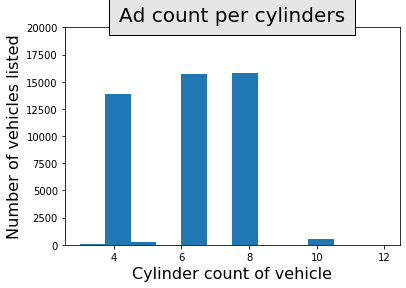

In [28]:
# histo of frequency of listings by model year
df['cylinders'].hist(bins=12, grid=False)
plt.ylabel('Number of vehicles listed', fontsize=16)
plt.ylim(0,20000)
plt.xlabel('Cylinder count of vehicle', fontsize=16)
plt.title('Ad count per cylinders', bbox={'facecolor':'0.9', 'pad':10}, fontsize=20)
plt.show()

In [29]:
# how many unique entries 
print('Number of unique cylinders values')
df['cylinders'].nunique()

Number of unique cylinders values


7

Over 10% of the cylinder column is missing values. There are 7 unique entries for cylinders, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, and 12.0. We verified that these are valid values for cylinders (online research). Cars with 4.0, 6.0, and 8.0 cylinders are by far the most represented. The mean and median values are both 6.0, but it would be too simplistic to replace the missing values with 6.0.

We will replace the missing values with consideration of model and model_year as these characteristics do have a relationship to cylinder count in vehicles. We will use the median values in case there are extreme values skewing the results. 

In [30]:
# fill in values using model and model_year
print('Fill in missing values of cylinders based on model and model_year.')
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model', 'model_year'])['cylinders'].transform('median'))

# df['cylinders'] = df.groupby(['model','model_year'])['cylinders'].transform(lambda x: x.fillna(x.median()))
# above also works, but throws warning

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in data')
df['cylinders'].isnull().sum()

Fill in missing values of cylinders based on model and model_year.
Verify that there are no missing values in data


32

We still have 32 rows with missing cylinders. This is because some combinations of model and model_year are not associated with a value in cylinders, therefore there is no cylinders value to insert. 

We will replace the remaining rows using only model as a groupby.

In [31]:
# fill in values using model
print('Fill in missing values of cylinders based on model.')
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in data')
df['cylinders'].isnull().sum()

Fill in missing values of cylinders based on model.
Verify that there are no missing values in data


0

In [32]:
# investigate cylinder column
print('cylinders  # of listings')
df['cylinders'].value_counts().sort_index()

cylinders  # of listings


3.0        34
4.0     15479
4.5         2
5.0       311
5.5         1
6.0     17483
7.0        14
8.0     17635
10.0      564
12.0        2
Name: cylinders, dtype: int64

In [33]:
# how many unique entries 
print('Number of unique cylinders values')
df['cylinders'].nunique()

Number of unique cylinders values


10

So we've created a problem because we've gone from 7 unique cylinders values to 10. We will manually reassign these bad values. 4.5 -> 4.0, 5.5 -> 5.0, and 7.0 -> 8.0 (because there are more 8.0 than 6.0).

In [34]:
# reassign values per rule
df.loc[df['cylinders'] == 4.5, 'cylinders'] = 4.0
df.loc[df['cylinders'] == 5.5, 'cylinders'] = 5.0
df.loc[df['cylinders'] == 7.0, 'cylinders'] = 8.0

# verify how many unique entries 
print('Number of unique cylinders values')
df['cylinders'].nunique()

Number of unique cylinders values


7

In [35]:
# verify the values in cylinder column
print('cylinders  # of listings')
df['cylinders'].value_counts().sort_index()

cylinders  # of listings


3.0        34
4.0     15481
5.0       312
6.0     17483
8.0     17649
10.0      564
12.0        2
Name: cylinders, dtype: int64

In [36]:
# investigate cylinder stats
print('cylinders stats after replacing values')
df['cylinders'].describe()

cylinders stats after replacing values


count    51525.000000
mean         6.120136
std          1.657138
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

We've verified that we filled in the missing values of cylinders using the influence of the median values for model and model_year. We corrected the 3 new values that arose and verified the same 7 values remain. The new statistics are a little different (mean is now 6.120136 versus 6.125235). 

Filling in missing values for odometer is next. Over 15% of the odometer column is missing values. 

In [37]:
# investigate stats on odometer column
print('odometer stats')
df['odometer'].describe()

odometer stats


count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [38]:
# investigate odometer column
print('odometer  # of listings')
df['odometer'].value_counts().sort_index()

odometer  # of listings


0.0         185
1.0          28
2.0           2
3.0           1
5.0           9
           ... 
840000.0      2
866000.0      1
920000.0      1
980000.0      1
990000.0      2
Name: odometer, Length: 17762, dtype: int64

In [39]:
# check for means for odometer readings depending on condition
print('Mean odometer readings depending on condition.')
mean_odometer_by_condition = df.pivot_table(index='condition', values='odometer', aggfunc='mean')
mean_odometer_by_condition

Mean odometer readings depending on condition.


,odometer
condition,
excellent,106687.682258
fair,183062.233577
good,129919.930980
like new,79426.738166
new,43476.056000
salvage,140919.989796


In [40]:
# check for medians for odometer readings depending on condition
print('Median odometer readings depending on condition.')
median_odometer_by_condition = df.pivot_table(index='condition', values='odometer', aggfunc='median')
median_odometer_by_condition

Median odometer readings depending on condition.


,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


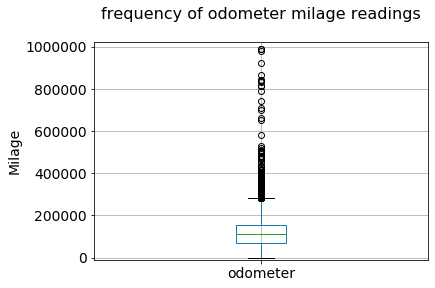

In [41]:
# boxplot of odometer
df.boxplot('odometer', fontsize=14)
plt.ylabel('Milage', fontsize=14)
plt.ylim(-10000,1020000)
plt.xlabel('')
plt.title('frequency of odometer milage readings\n', fontsize=16)
plt.show()

Milage will likely correlate with model_year and condition. Again, we will use median values to minimize influence of extreme values.

In [42]:
# replace missing values in odometer readings based on mean odometer readings by condition and model_year
print('Fill in missing values of odometer based on condition & model_year')
df['odometer'] = df['odometer'].fillna(df.groupby(['condition', 'model_year'])['odometer'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in odometer column')
df['odometer'].isnull().sum()

Fill in missing values of odometer based on condition & model_year
Verify that there are no missing values in odometer column


8

In [43]:
# replace missing values in odometer readings based on mean odometer readings by model_year
print('Fill in missing values of odometer based on model_year')
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in odometer column')
df['odometer'].isnull().sum()

Fill in missing values of odometer based on model_year
Verify that there are no missing values in odometer column


1

In [44]:
# replace missing values in odometer readings based on mean odometer readings by condition
print('Fill in missing values of odometer based on condition')
df['odometer'] = df['odometer'].fillna(df.groupby(['condition'])['odometer'].transform('median'))

# print the number of missing values in data after filling nan
print('Verify that there are no missing values in odometer column')
df['odometer'].isnull().sum()

Fill in missing values of odometer based on condition
Verify that there are no missing values in odometer column


0

In [45]:
# investigate stats on odometer column
print('odometer stats')
df['odometer'].describe()

odometer stats


count     51525.000000
mean     115212.621043
std       62228.702778
min           0.000000
25%       73018.000000
50%      114671.000000
75%      152955.000000
max      990000.000000
Name: odometer, dtype: float64

We've verified that we filled in the missing values of odometer using the influence of the median values for condition and model_year. The new statistics are a different (mean is now 115212.621043 versus 115553.461738). 

Investigating the paint_color column is next. Over 17% of the paint_color column is missing values. 

In [46]:
# investigate stats on paint_color column
print('paint_color stats')
df['paint_color'].describe()

paint_color stats


count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [47]:
# investigate paint_color column
print('paint_color  # of listings')
df['paint_color'].value_counts().sort_values(ascending=False)

paint_color  # of listings


white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

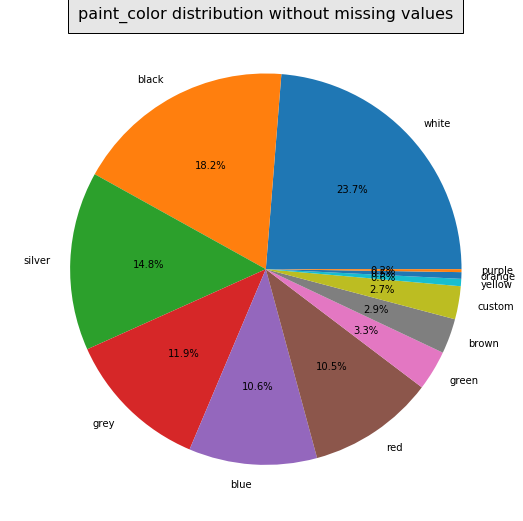

In [48]:
# pie graph of colors
df['paint_color'].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%') 
plt.ylabel(' ')
plt.title('paint_color distribution without missing values', bbox={'facecolor':'0.9', 'pad':10}, fontsize=16)
plt.show()

Replacing 17% of the paint_color column's value will have a substantial effect on any analysis involving that column. We have a total of 12 unique colors and the top 3 are white, black, and silver. Over 50% of the total are either white, black, silver or grey. Even if we replaced the missing values in some sort of proportional or logical way, it would still be based on uneducated guesses. Is a 8.0 cylinder SUV more likely to be red or black? How about a excellent condition 2024 sedan?

Sometimes, it is advisable to leave a missing value as is. Since there is no way to predict a paint color based on model, model_year, condition, fuel, transmission, type, etc. we will assign the missing paint_color values as unknown.

In [49]:
# fill in missing values of paint_color with unknown
df['paint_color'].fillna(value='unknown', inplace = True)
print('Fill in missing values of paint_color with unknown')
print('Verify there are no longer any missing values in paint_color.')
df['paint_color'].isnull().sum()

Fill in missing values of paint_color with unknown
Verify there are no longer any missing values in paint_color.


0

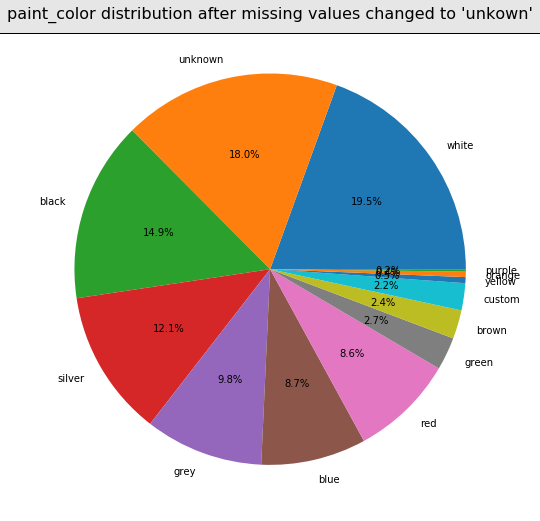

In [50]:
# pie graph of colors
df['paint_color'].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%') 
plt.ylabel(' ')
plt.title('paint_color distribution after missing values changed to \'unkown\'', bbox={'facecolor':'0.9', 'pad':10}, fontsize=16)
plt.show()

In [51]:
# investigate stats on paint_color column
print('paint_color stats')
df['paint_color'].describe()

paint_color stats


count     51525
unique       13
top       white
freq      10029
Name: paint_color, dtype: object

We've verified there are no remaining missing values as we've replaced them with 'other'. The last column to examine for missing values is is_4wd. Over 50% of the is_4wd column is missing values. 

In [52]:
# investigate stats on is_4wd column
print('is_4wd stats')
df['is_4wd'].describe()

is_4wd stats


count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

In [53]:
# how many is_4wd listings are 1.0
print('# of listings where is_4wd = 1.0.')
df['is_4wd'].sum()

# of listings where is_4wd = 1.0.


25572.0

In [54]:
# how many is_4wd listings are missing
print('# of listings where is_4wd is missing.')
df['is_4wd'].isnull().sum()

# of listings where is_4wd is missing.


25953

In [55]:
# print rows where is_4wd has a value
print('Rows where is_4wd is has a value (1.0).')
df.query('is_4wd.notnull()').head(10)

Rows where is_4wd is has a value (1.0).


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2006.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,unknown,1.0,2019-04-02,37
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
15,17990,2013.0,ram 1500,excellent,8.0,gas,98242.0,automatic,pickup,red,1.0,2018-05-15,111


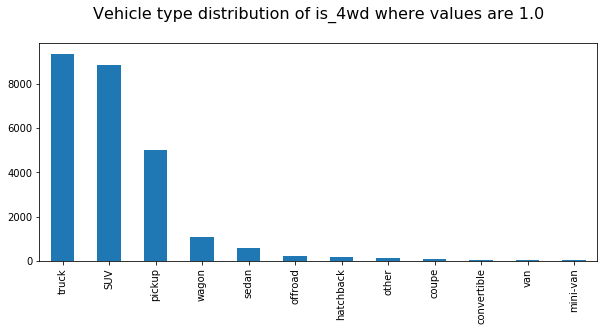

In [56]:
# bar graph of vehicle type distribution of is_4wd where values are 1.0
wd_not_null = df.query('is_4wd.notnull()')
wd_not_null['type'].value_counts().plot(kind='bar', figsize=(10,4)) 
plt.ylabel('')
plt.xlabel('')
plt.title('Vehicle type distribution of is_4wd where values are 1.0\n', fontsize=16)
plt.show()

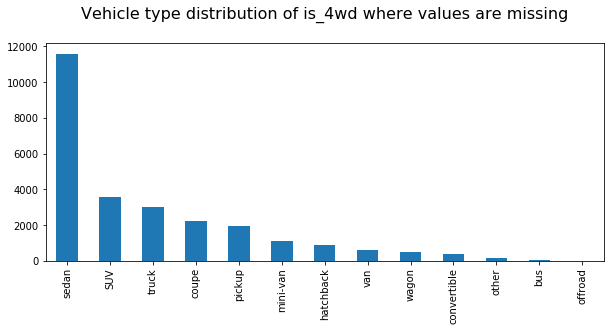

In [57]:
# bar graph of vehicle type distribution of is_4wd where values are missing
null_wd = df.query('is_4wd.isnull()')
null_wd['type'].value_counts().plot(kind='bar', figsize=(10,4)) 
plt.ylabel('')
plt.xlabel('')
plt.title('Vehicle type distribution of is_4wd where values are missing\n', fontsize=16)
plt.show()

is_4wd is missing about 50% of values and the other rows are listed as '1.0'. We compared the distribution of the vehicle types for the group where is_4wd = 1.0 and for the group of missing values. When the values are 1.0, there is a higher proportion of vehicles likely to have 4wd (truck, SUV, pickup, wagon). While a sedan, a vehicle less likely to have 4wd, is the overwhelming majority in the group missing values. Therefore, the value 1.0 likely indicates 'yes', and we will replace the missing values with 0 to indicate 'no' and change the data type to boolean in the next section.

In [58]:
# fill in missing values of is_4wd with 0
df['is_4wd'].fillna(value=0, inplace = True)
print('Fill in missing values of is_4wd with 0 to indicate no.')
print('Verify there are no longer any missing values in is_4wd.')
df['is_4wd'].isnull().sum()

Fill in missing values of is_4wd with 0 to indicate no.
Verify there are no longer any missing values in is_4wd.


0

In [59]:
# verify replacement value
print('   is_4wd')
print('value  count')
df['is_4wd'].value_counts().sort_index()

   is_4wd
value  count


0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [60]:
# investigate missing values
print('Verify no more missing values.\n')
ratio = 100*df.isnull().sum() / len(df)
print('Column\t\tPercent Missing')
ratio

Verify no more missing values.

Column		Percent Missing


price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

We've verified filling in missing values in is_4wd and also verified there are no more missing values in the df.

Now we will examine the data types and change them where needed because that may make calculations and data analysis easier. Also, changing data types may decrease total memory usage (a concern for bigger dataframes, but good to get in the practice).

In [61]:
# calculate total memory usage before
memory_before = df.memory_usage().sum() / (1024**2) #converting to megabytes
memory_before = memory_before.round(2)
print('Memory useage before data type changes:', memory_before, ' MB.')

Memory useage before data type changes: 5.11  MB.


In [62]:
# refresh our memory on data types assignments
print('Data types before changes\n')
print('Column\t\tData type')
df.dtypes

Data types before changes

Column		Data type


price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [63]:
# change data type for is_4wd to boolean to reflect
# vehicles either have 4wd or don't
df['is_4wd'] = df['is_4wd'].astype('bool')
print('Verify is_4wd data type changed to boolean')
print('to reflect vehicles either have 4wd or don\'t.')
print('value    count')
df['is_4wd'].value_counts().sort_index()

Verify is_4wd data type changed to boolean
to reflect vehicles either have 4wd or don't.
value    count


False    25953
True     25572
Name: is_4wd, dtype: int64

In [64]:
# change date to datetime format to reflect the true data type and for
# use in calculations/analysis
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
print('Verify date_posted data type changed to datetime64')
print('to reflect the true type of the data for analysis.')
df['date_posted'].dtypes

Verify date_posted data type changed to datetime64
to reflect the true type of the data for analysis.


dtype('<M8[ns]')

In [65]:
# print the top row to see the date format
df.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19


In [66]:
# change data types for model_year (float64), and cylinders (float64), odometer (float64).
# They should be integers for ease of understanding, calculation, and representation.
# odometer needs to be int32 for the larger numbers.
# converting from float64 to int16/int32 takes 2 steps, 1st numpy to int, then astype

df['model_year'] = df['model_year'].apply(np.int)
df['model_year'] = df['model_year'].astype('int16')
df['cylinders'] = df['cylinders'].apply(np.int)
df['cylinders'] = df['cylinders'].astype('int16')
df['odometer'] = df['odometer'].apply(np.int)
df['odometer'] = df['odometer'].astype('int32')

# change price (int64) and days_listed (int64) to int32 and int16 for memory reduction.
df['price'] = df['price'].astype('int32')
df['days_listed'] = df['days_listed'].astype('int16')

# verify data types assignments
print('Verify changes to int16 or int32\nNote if the value exceeds +/- 32,767 we must use int32\n\
\nColumn\t\t\tData type')
df.dtypes

Verify changes to int16 or int32
Note if the value exceeds +/- 32,767 we must use int32

Column			Data type


price                    int32
model_year               int16
model                   object
condition               object
cylinders                int16
fuel                    object
odometer                 int32
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int16
dtype: object

In [67]:
# investigate how many unique values 
print('Check for number of unique values for model')
df['model'].value_counts().sort_index()

Check for number of unique values for model


acura tl             236
bmw x5               267
buick enclave        271
cadillac escalade    322
chevrolet camaro     414
                    ... 
toyota sienna        329
toyota tacoma        827
toyota tundra        603
volkswagen jetta     519
volkswagen passat    350
Name: model, Length: 100, dtype: int64

In [68]:
# how many unique entries 
print('Number of unique cylinders values')
df['cylinders'].nunique()

Number of unique cylinders values


7

In [69]:
# investigate cylinder column
print('cylinders  # of listings')
df['cylinders'].value_counts().sort_index()

cylinders  # of listings


3        34
4     15481
5       312
6     17483
8     17649
10      564
12        2
Name: cylinders, dtype: int64

In [70]:
# check the number of unique values
print('Number of unique values for condition:')
df['condition'].nunique()

Number of unique values for condition:


6

In [71]:
# check the number of unique values
print('Number of unique values for fuel:')
df['fuel'].nunique()

Number of unique values for fuel:


5

In [72]:
# check the number of unique values
print('Number of unique values for transmission:')
df['transmission'].nunique()

Number of unique values for transmission:


3

In [73]:
# check the number of unique values
print('Number of unique values for type:')
df['type'].nunique()

Number of unique values for type:


13

Changing from object to category can save memory, but it is better used when the number of options is relatively small. Since model has 100 options, we will leave that as object data type. the other objects will be changed to category.

In [74]:
# change the datatypes from object to category
# for those columns with less than 15 unique values 
# for memory and efficiency
df['condition'] = df['condition'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['type'] = df['type'].astype('category')
df['paint_color'] = df['paint_color'].astype('category')

# check data types assignments
print('  Data types after changes:')
print('Column\t\t\tData type')
df.dtypes

  Data types after changes:
Column			Data type


price                    int32
model_year               int16
model                   object
condition             category
cylinders                int16
fuel                  category
odometer                 int32
transmission          category
type                  category
paint_color           category
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int16
dtype: object

In [75]:
# calculate total memory usage after change
memory_after = df.memory_usage().sum() / (1024**2) #converting to megabytes
memory_change = memory_before - memory_after
memory_before = memory_before.round(2)
memory_after = memory_after.round(2)
memory_change = memory_change.round(2)
print('Memory useage before data type changes:', memory_before, 'MB.')
print('Memory useage after data type changes:', memory_after, 'MB.')
print('Changing data types saved', memory_change, 'MB.')

Memory useage before data type changes: 5.11 MB.
Memory useage after data type changes: 1.77 MB.
Changing data types saved 3.34 MB.


In [76]:
# verify rows pass visual inspection after changes
print('First 10 rows after changes.')
df.head(10)

First 10 rows after changes.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2006,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,196919,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17


<a class="anchor" id="data_preprocessing_conclusion"></a>
### Data preprocessing conclusion

Missing values happen for many reasons including human errors, no record of the information, misunderstanding of data types, problems joining files/databases, or problems transferring information.

In the preprocessing section we found missing values in 5 columns:

Column | Percent Missing | Action Taken with Missing Values
------------ | ------------- | -----------------------------------------------------------
model_year | 7.023775 |  Filled in using the influence of condition, model, and type variables
cylinders | 10.208637 | Filled in using the influence of model and model_year and fixed 17 category values 
odometer | 15.316836 | Filled in using the influence of model_year and condition
paint_color | 17.985444 | Changed to 'unknown' because there was no way to assign a color.
is_4wd | 50.369723 | Replaced Nan with 0 to indicate False after verifying the distribution of vehicles aligned with 4wd

When replacing values, we selected the median over the means to minimize the impact of extreme values. When we replaced values using the influence of multiple variables, sometimes we still had missing values. For instance, after the first round of filling in model_year, we still had 27 rows with missing model_year. This is because some combinations of condition, model, and type were not associated with a model year, therefore there was no model year to insert. In such cases, we removed variables and filled in values until the column was completely filled in.

When filling in cylinders with medians, we did end up with 17 values outside of the 7 cylinders categories. We manually reassigned those.

As an experiment, we replaced the missing values of model_year with the median/mean of 2011 and compared the statistics to the run where we filled in values using the influence of condition, model and type. We noticed a difference and felt assured that it was worthwhile to take the extra steps to fill in missing values based on the influence of known values.

We changed the data types as follows:

Column | Data Type Before | Data Type After 
------------ | ------------- | -----------------
price | int64 | int32 
model_year | float64 | int16  
model  | object |                 object
condition  | object |           category
cylinders  | float64 |              int16
fuel      | object |              category
odometer | float64 |                 int32
transmission   | object |         category
type   | object |                 category
paint_color  | object |           category
is_4wd  | float64 |                   bool
date_posted  | object |   datetime64[ns]
days_listed  | int64 |            int16

We changed date-posted to match its data type, a datetime. We changed is_4wd to indicate a True/False boolean. Also, we changed model_year, cylinders, odometer from float to int to a match the character of the values. We also changed some data types to conserve memory. Overall, these changes result in easier calculations, reduced memory usage, and efficiency.

[Return to table of contents](#table_of_contents)

<a class="anchor" id="calculations"></a>
## Make calculations and add them to the table

- Make calculations and add them to the table
    - Day of the week, month, and year the ad was placed.
    - The vehicle's age (in years) when the ad was placed.
    - The vehicle's average mileage per year.
    - In the condition column, replace string values with a numeric scale.
        - new = 5
        - like new = 4
        - excellent = 3
        - good = 2
        - fair = 1
        - salvage = 0
    - Summarize actions taken and rationales in [Calculations conclusion section](#calculations_conclusion).

In [77]:
# create column, ad_weekday, the day of the week the ad was placed
df['ad_weekday'] = df['date_posted'].dt.weekday
df['ad_weekday'] = df['ad_weekday'].astype('int16')
print('The statistics for new column\n\tad_weekday')
df['ad_weekday'].value_counts().sort_index()

The statistics for new column
	ad_weekday


0    7339
1    7295
2    7299
3    7510
4    7334
5    7392
6    7356
Name: ad_weekday, dtype: int64

In [78]:
# create column, ad_month, the month the ad was placed
df['ad_month'] = df['date_posted'].dt.month
df['ad_month'] = df['ad_month'].astype('int16')
print('The statistics for new column\n\tad_month')
df['ad_month'].value_counts().sort_index()

The statistics for new column
	ad_month


1     4452
2     4014
3     4559
4     2817
5     4503
6     4216
7     4471
8     4480
9     4452
10    4643
11    4354
12    4564
Name: ad_month, dtype: int64

In [79]:
# create column, ad-year, the year the ad was placed
df['ad_year'] = df['date_posted'].dt.year
df['ad_year'] = df['ad_year'].astype('int16')
print('The statistics for new column\n\tad_year')
df['ad_year'].value_counts().sort_index()

The statistics for new column
	ad_year


2018    35683
2019    15842
Name: ad_year, dtype: int64

In [80]:
# verify new columns created
print('Verify ad_weekday, ad_month, and ad_year created.')
df.head(1)

Verify ad_weekday, ad_month, and ad_year created.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018


In [81]:
# create column, age_in_years, vehicle's age in years when the ad was placed

df['age_in_years'] = (df['ad_year'] - df['model_year'])
df['age_in_years'] = df['age_in_years'].astype('int16')

# print stats on age_in_years
print('The statistics for new column\n\tage_in_years')
df['age_in_years'].describe()

The statistics for new column
	age_in_years


count    51525.000000
mean         8.522872
std          6.153912
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_in_years, dtype: float64

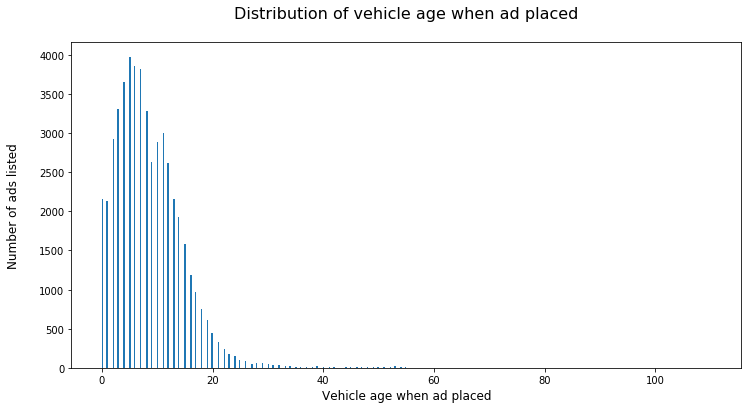

In [82]:
# create histogram to check out distribution
plt.title('Distribution of vehicle age when ad placed\n', fontsize=16)
plt.ylabel('Number of ads listed\n', fontsize=12)
plt.xlabel('Vehicle age when ad placed', fontsize=12)
df['age_in_years'].hist(bins=400, figsize=(12,6), grid=False)
plt.show()

The distribution of vehicle age when ad placed indicates most cars were 20 years old or less. There must be some really old ones in the data set though, since the max age is 110 years.

In [83]:
# verify new columns created
print('Verify new columns created.')
df.head(1)

Verify new columns created.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_in_years
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7


In [84]:
# create a new function, calc_yearly_miles

def calc_yearly_miles(row):
    # this function determines milage per year for a vehicle
    milage = row['odometer']
    years = row['age_in_years']
    # if the odometer reads 0, we return 0 miles
    if milage == 0:
        return 0
    # if the vehicle is less than 1 year old, we return the milage
    elif years == 0:
        return milage
    # otherwise, we return miles/years for miles_per_year
    else:
        miles_per_year = milage/years
        return milage/years
    
# create column avg_yearly_miles, vehicle's average milage per year
df['avg_yearly_miles'] = df.apply(calc_yearly_miles, axis=1)

# change data type of avg_yearly_miles to int32
df['avg_yearly_miles'] = df['avg_yearly_miles'].astype('int32')

# print the stats of avg_yearly_miles
print('The statistics for new column\n\tavg_yearly_miles')
df['avg_yearly_miles'].describe()

The statistics for new column
	avg_yearly_miles


count     51525.000000
mean      17794.439030
std       12609.704466
min           0.000000
25%       10909.000000
50%       15200.000000
75%       21237.000000
max      373200.000000
Name: avg_yearly_miles, dtype: float64

In [85]:
df.query('avg_yearly_miles < 0').count()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd              0
date_posted         0
days_listed         0
ad_weekday          0
ad_month            0
ad_year             0
age_in_years        0
avg_yearly_miles    0
dtype: int64

In [86]:
# replace string values in condition with numeric scale

# create a new function, condition_level
def condition_level(row):
    
    condition_word = row['condition']
    
    if condition_word == 'new':
        return 5 
    elif condition_word == 'like new':
        return 4
    elif condition_word == 'excellent':
        return 3   
    elif condition_word == 'good':
        return 2  
    elif condition_word == 'fair':
        return 1 
    elif condition_word == 'salvage':
        return 0
    
# replace the word in condition with the number from fx
df['condition'] = df.apply(condition_level, axis=1)

# change data type
df['condition'] = df['condition'].astype('int16')

# verfiy new column: income_level
print('  condition column\nday  count')
df['condition'].value_counts().sort_index()

  condition column
day  count


0      115
1     1607
2    20145
3    24773
4     4742
5      143
Name: condition, dtype: int64

In [87]:
# verify all our new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price               51525 non-null int32
model_year          51525 non-null int16
model               51525 non-null object
condition           51525 non-null int16
cylinders           51525 non-null int16
fuel                51525 non-null category
odometer            51525 non-null int32
transmission        51525 non-null category
type                51525 non-null category
paint_color         51525 non-null category
is_4wd              51525 non-null bool
date_posted         51525 non-null datetime64[ns]
days_listed         51525 non-null int16
ad_weekday          51525 non-null int16
ad_month            51525 non-null int16
ad_year             51525 non-null int16
age_in_years        51525 non-null int16
avg_yearly_miles    51525 non-null int32
dtypes: bool(1), category(4), datetime64[ns](1), int16(8), int32(3), object(1)
memory usage: 2.4+ MB


In [88]:
df.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714


<a class="anchor" id="calculations_conclusion"></a>
### Calculations conclusion

Within the calculations section, we created new columns:

Column Name| Description | Data Type 
------------ | ------------- | -----------------
ad_weekday | the day of the week the ad was placed | int16 
ad_month | the month the ad was placed | int16 
ad_year | the year the ad was placed | int16 
age_in_years | vehicle\'s age in years when the ad was placed | int16 
avg_yearly_miles | vehicle\'s average mileage per year | int32 
 
We also changed the condition column to a numeric scale (int16).

We verified the creation of these new columns. These new columns will help with our analysis and converting the condition column into a numeric scale makes it easier to assess the impact.

[Return to table of contents](#table_of_contents)

<a class="anchor" id="exploratory_data_analysis"></a>
## Carry out exploratory data analysis

- Carry out exploratory data analysis
    - Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.
    - Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.
    - Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.
    - Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.
    - Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.
    - What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.
    - Write general observations and identify potential areas for further investigation.

In [89]:
# investigate the statistics associated with the columns
columns_to_plot = df[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']]
columns_to_plot.describe()

,price,age_in_years,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.522872,115212.612654,6.120136,2.637535
std,10040.803015,6.153912,62228.701740,1.657138,0.712447
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,73018.000000,4.000000,2.000000
50%,9000.000000,7.000000,114671.000000,6.000000,3.000000
75%,16839.000000,12.000000,152955.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


In [90]:
# investigate the distribution of counts of values by columns
for column in columns_to_plot:
    print('\n' + column + ' distribution')
    print(df[column].value_counts().sort_index())


price distribution
1         798
3           1
5           1
6           1
9           1
         ... 
145000      1
175000      1
189000      6
300000      1
375000      1
Name: price, Length: 3443, dtype: int64

age_in_years distribution
0      2158
1      2135
2      2922
3      3305
4      3658
       ... 
69        1
71        1
82        1
89        1
110       2
Name: age_in_years, Length: 68, dtype: int64

odometer distribution
0         185
1          28
2           2
3           1
5           9
         ... 
840000      2
866000      1
920000      1
980000      1
990000      2
Name: odometer, Length: 17814, dtype: int64

cylinders distribution
3        34
4     15481
5       312
6     17483
8     17649
10      564
12        2
Name: cylinders, dtype: int64

condition distribution
0      115
1     1607
2    20145
3    24773
4     4742
5      143
Name: condition, dtype: int64


From the statistics table we notice the median and the mean vary by a large amount in the price and age_in_years columns, so we suspect there is a strong outlier influence in these columns. 

When looking at the the max values for price, age in years, and odometer, there is a large gap between the values at 75% and the max, again suggesting we need to investigate high values.

From the distribution counts, we notice the lowest and highest values in both the cylinders and condition columns are disproportionately lower. There are only 7 values in cylinders and 6 in conditions. Could the high/low values be worth eliminating, especially the 2 values for 12 cylinders?

Now, we will investigate the histograms using a low number of bins(10) and then a large bin(300).

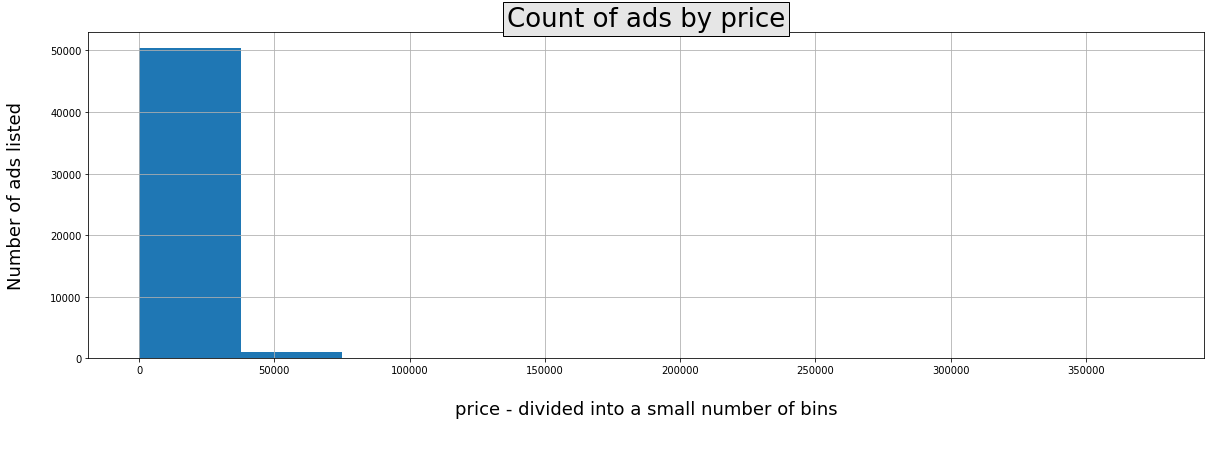

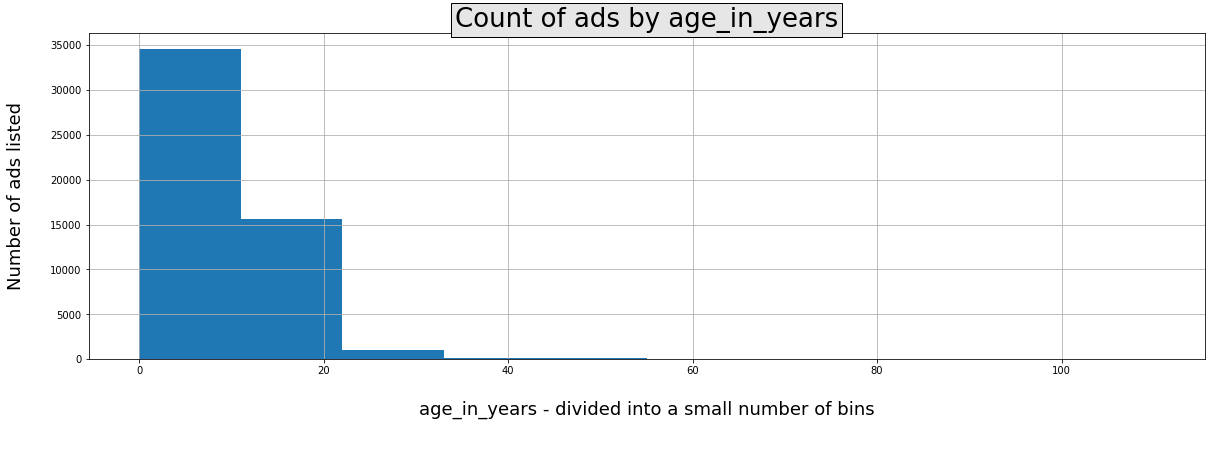

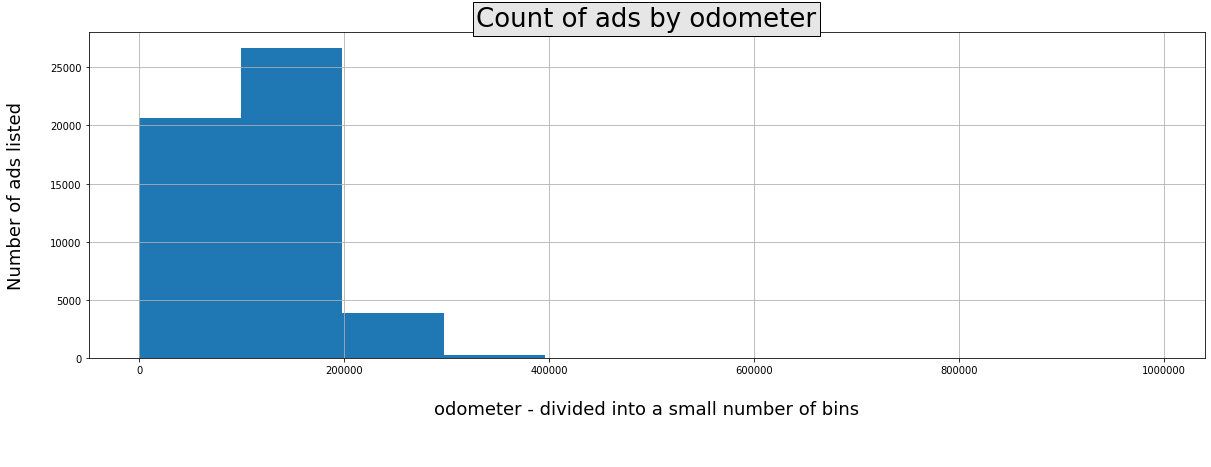

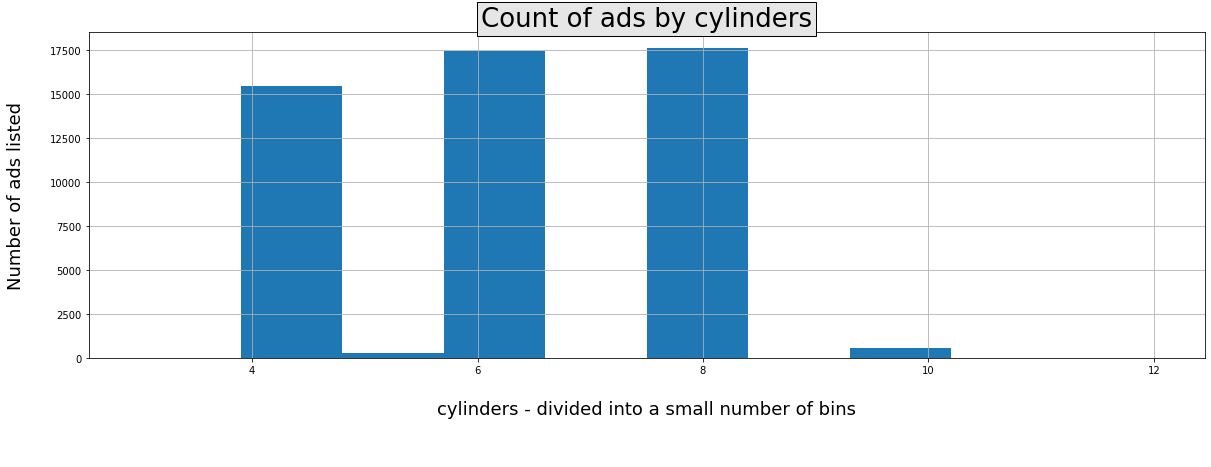

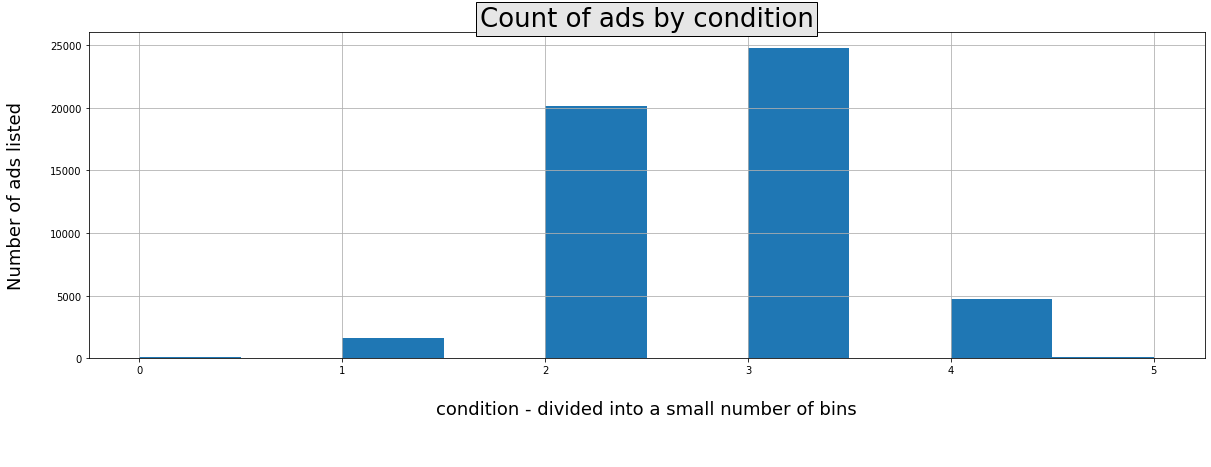

In [91]:
# create histograms to check out distribution of price, vehicle age, milage, cylinders
# used a large bin number to emphasize high outliers

for column in columns_to_plot:
    df[[column]].hist(bins=10, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a small number of bins\n\n', fontsize=18)
    plt.title('Count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
plt.show()

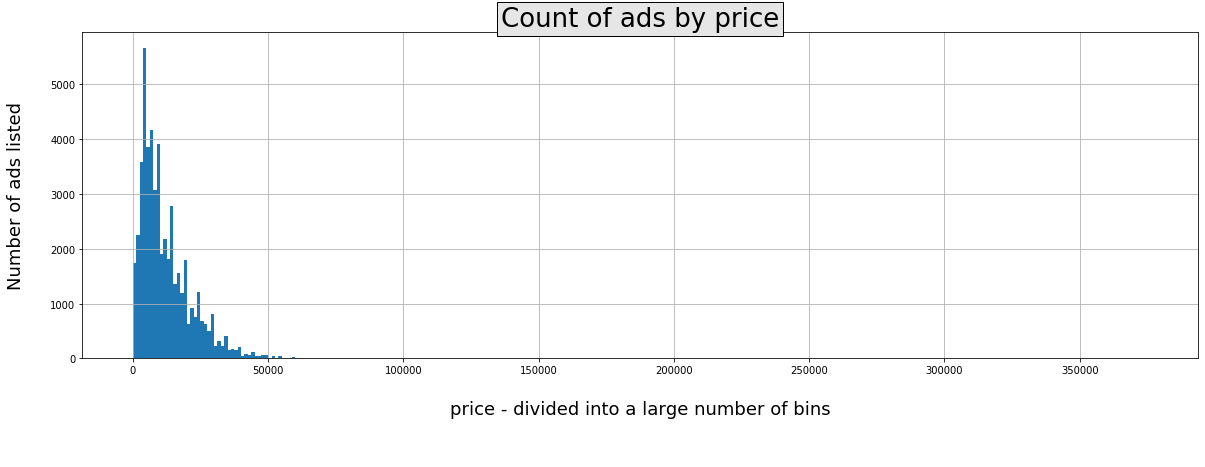

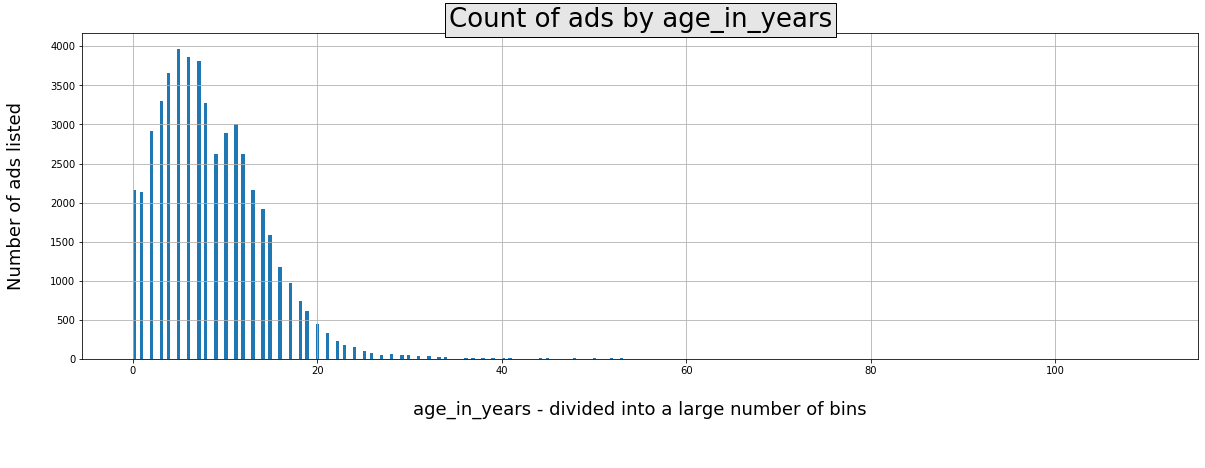

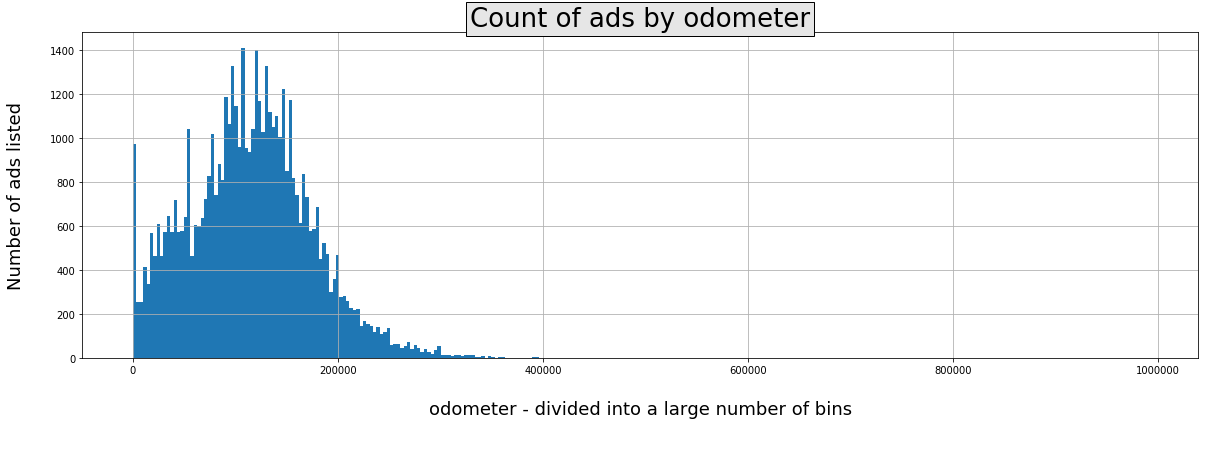

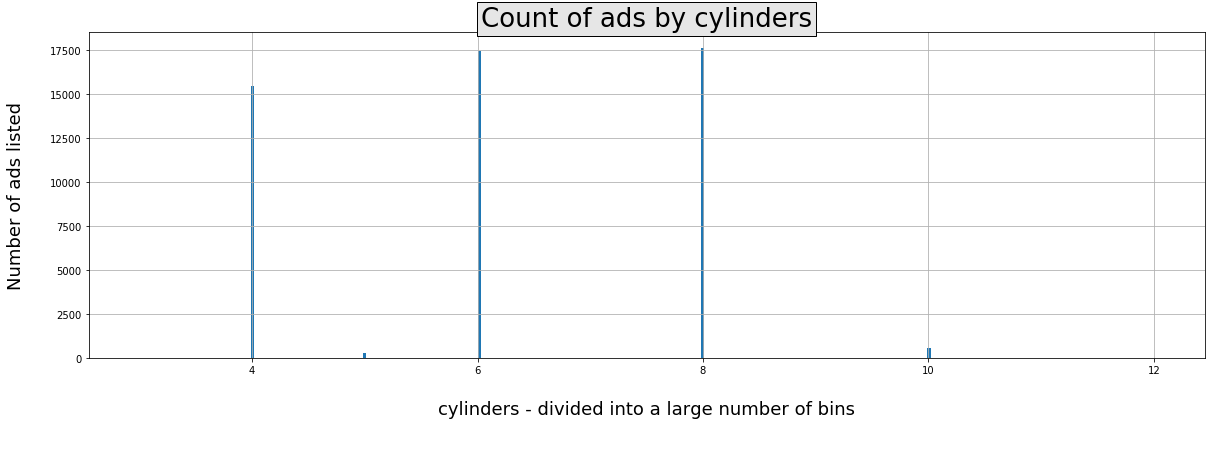

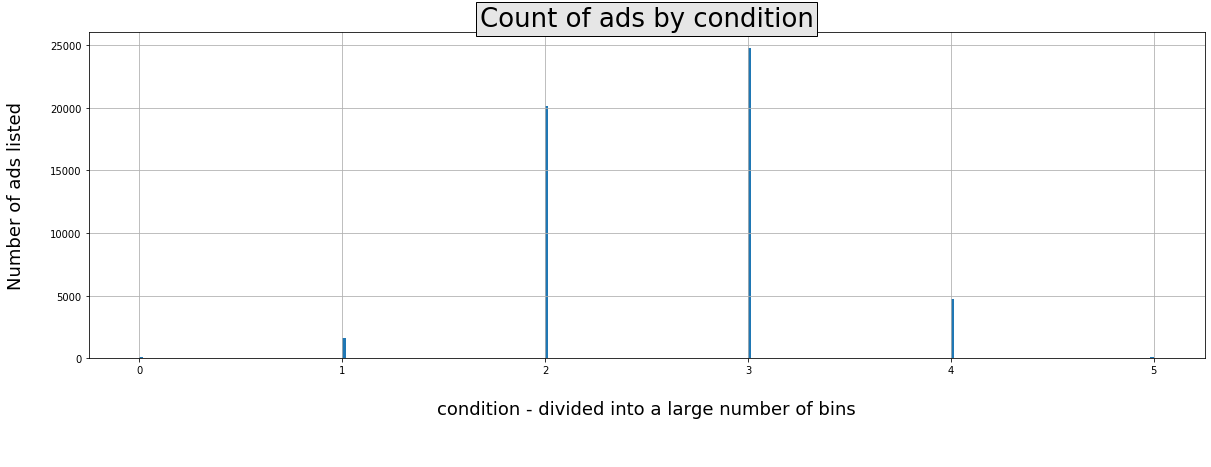

In [92]:
# create histograms to check out distribution of price, vehicle age, milage, cylinders
# used a large bin number to emphasize high outliers

for column in columns_to_plot:
    df[[column]].hist(bins=300, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a large number of bins\n\n', fontsize=18)
    plt.title('Count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
plt.show()

Outliers skew the distribution of price, age_in_years, and odometer no matter the bin size, but it is clearer to see the outliers on the graph with a larger bin size. The smaller bin size highlights the uneven distribution of counts across the cylinders and condition columns.

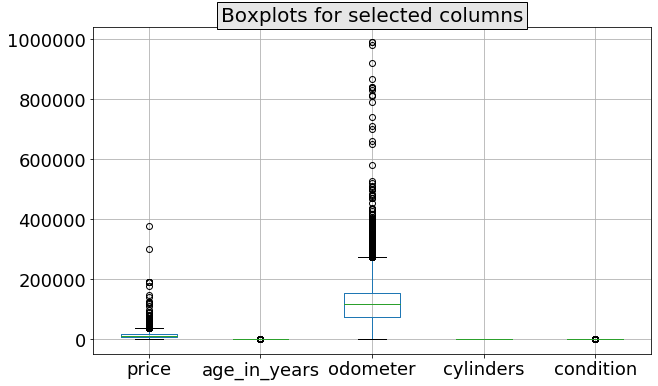

In [93]:
# use boxplots to demonstrate outliers
columns_to_plot.boxplot(figsize=(10,6), fontsize=18)
plt.title('Boxplots for selected columns', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.show()

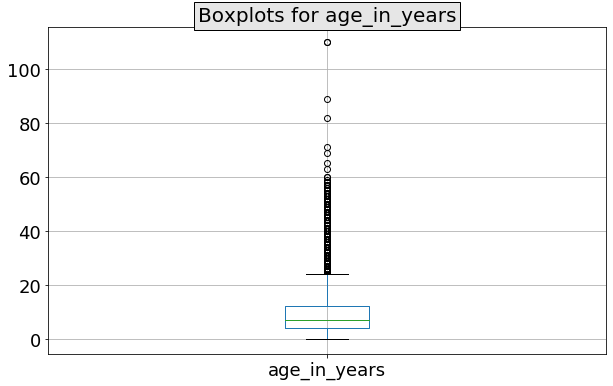

In [94]:
# use boxplots to demonstrate outliers
df.boxplot('age_in_years', figsize=(10,6), fontsize=18)
plt.title('Boxplots for age_in_years', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.show()

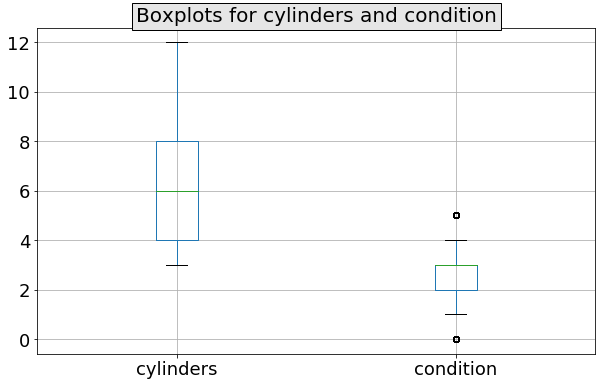

In [95]:
# use boxplots to demonstrate outliers
df.boxplot(['cylinders', 'condition'], figsize=(10,6), fontsize=18)
plt.title('Boxplots for cylinders and condition', bbox={'facecolor':'0.9', 'pad':4}, fontsize=20)
plt.show()

The boxplots visually demonstrate four of the five columns (not cylinders) have upper limit outliers to filter from the df. Additionally, condition has a lower limit outlier, but for this analysis we will focuses on removing upper limit outliers only.

Now we will make a copy of the dataframe for filtered data and outliers_df, calculate the upper limits for outliers, and populate our new dataframes.

In [96]:
# make copies of the df, filtered_df and 
filtered_df = df.copy()
outliers_df = df.copy()

In [97]:
# calculate and print the outlier upper limits
print('Upper outlier limits:\n')

# calculate outlier upper limits price
Q1 = df['price'].quantile(.25)
Q3 = df['price'].quantile(.75)
IQR = Q3-Q1
upper_outlier_price = Q3 + 1.5*IQR
print('Upper bound for price:', upper_outlier_price)

# calculate outlier upper limits age_in_years
Q1 = df['age_in_years'].quantile(.25)
Q3 = df['age_in_years'].quantile(.75)
IQR = Q3-Q1
upper_outlier_age_in_years = Q3 + 1.5*IQR
print('Upper bound for age_in_years:', upper_outlier_age_in_years)

# calculate outlier upper limits odometer
Q1 = df['odometer'].quantile(.25)
Q3 = df['odometer'].quantile(.75)
IQR = Q3-Q1
upper_outlier_odometer = Q3 + 1.5*IQR
print('Upper bound for odometer:', upper_outlier_odometer)

# calculate outlier upper limits cylinders
Q1 = df['cylinders'].quantile(.25)
Q3 = df['cylinders'].quantile(.75)
IQR = Q3-Q1
upper_outlier_cylinders = Q3 + 1.5*IQR
print('Upper bound for cylinders:', upper_outlier_cylinders)

# calculate outlier upper limits condition
Q1 = df['condition'].quantile(.25)
Q3 = df['condition'].quantile(.75)
IQR = Q3-Q1
upper_outlier_condition = Q3 + 1.5*IQR
print('Upper bound for condition:', upper_outlier_condition)

Upper outlier limits:

Upper bound for price: 34597.5
Upper bound for age_in_years: 24.0
Upper bound for odometer: 272860.5
Upper bound for cylinders: 14.0
Upper bound for condition: 4.5


In [98]:
# populate filtered_df based on <= upper outlier limits

filtered_df = filtered_df[filtered_df.price <= upper_outlier_price]
filtered_df = filtered_df[filtered_df.age_in_years <= upper_outlier_age_in_years]
filtered_df = filtered_df[filtered_df.odometer <= upper_outlier_odometer]
# the cylinder upper limit is greater than the highest value, so it doesn't change
filtered_df = filtered_df[filtered_df.cylinders <= upper_outlier_cylinders]
filtered_df = filtered_df[filtered_df.condition <= upper_outlier_condition]

# populate outliers_df with outlier rows (rows not in filtered data)
outliers_df = df[~df.isin(filtered_df)]
                         
# print out original, filtered, outliers column stats
print('Compare statistics between the original, the filtered and the outliers only data frames:\n')
print('Original Data Frame')
columns_to_plot = df[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']]
print(columns_to_plot.describe())
print('\nFiltered Data Frame')
filtered_columns_to_plot = filtered_df[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']]
print(filtered_columns_to_plot.describe())
print('\nOutliers Data Frame')
outliers_columns_to_plot = outliers_df[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']]
# drop null values from outliers column
outliers_df.dropna(inplace=True)
print(outliers_columns_to_plot.describe())

Compare statistics between the original, the filtered and the outliers only data frames:

Original Data Frame
               price  age_in_years       odometer     cylinders     condition
count   51525.000000  51525.000000   51525.000000  51525.000000  51525.000000
mean    12132.464920      8.522872  115212.612654      6.120136      2.637535
std     10040.803015      6.153912   62228.701740      1.657138      0.712447
min         1.000000      0.000000       0.000000      3.000000      0.000000
25%      5000.000000      4.000000   73018.000000      4.000000      2.000000
50%      9000.000000      7.000000  114671.000000      6.000000      3.000000
75%     16839.000000     12.000000  152955.000000      8.000000      3.000000
max    375000.000000    110.000000  990000.000000     12.000000      5.000000

Filtered Data Frame
              price  age_in_years       odometer     cylinders     condition
count  48465.000000  48465.000000   48465.000000  48465.000000  48465.000000
mean   11202.

We note a dramatic difference in the statistics across all rows when the outliers only data frame is compared with the original and filtered data frames. This suggest removing the outliers was the best decision in this case.

In [99]:
# calculate and verify correct total of rows

print('Verify the correct number of rows for filtered_df and outliers_df\n')
print('The number of rows in the original column:\t', + len(df))
print('The number of rows of filtered_df column:\t', + len(filtered_df))
print('The number of rows of outliers_df columnt:\t', + len(outliers_df))
print('Sum of filtered_df and outliers_df columns:\t', + (len(filtered_df) + len(outliers_df)))

Verify the correct number of rows for filtered_df and outliers_df

The number of rows in the original column:	 51525
The number of rows of filtered_df column:	 48465
The number of rows of outliers_df columnt:	 3060
Sum of filtered_df and outliers_df columns:	 51525


We populated the new dataframes based on the outlier limits and verified the new df statistics. Filtering outliers separated 3060 values from the original dataset. We saved those nonnull values in outliers_df. 

Now the filtered_df (our working df) contains a total of 48465 files after removal of outliers. Additionally, since the upper limit outlier for cylinders was above the highest value for cylinders, no rows were filtered based on cylinders alone.

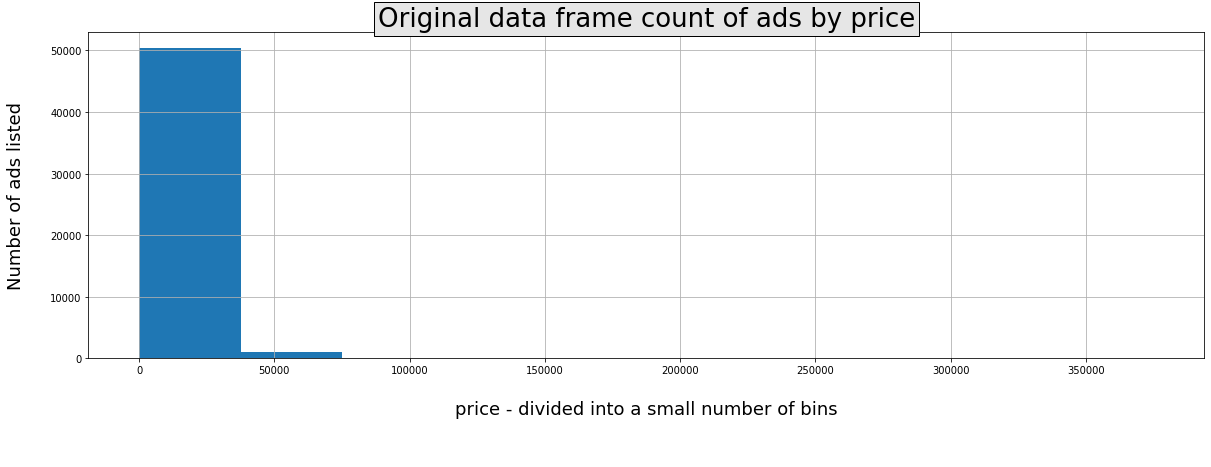

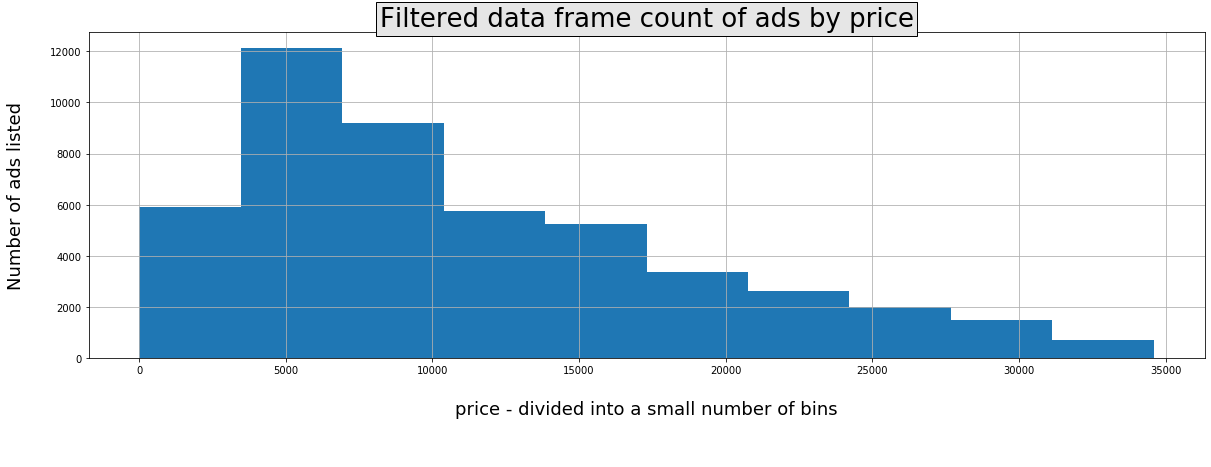

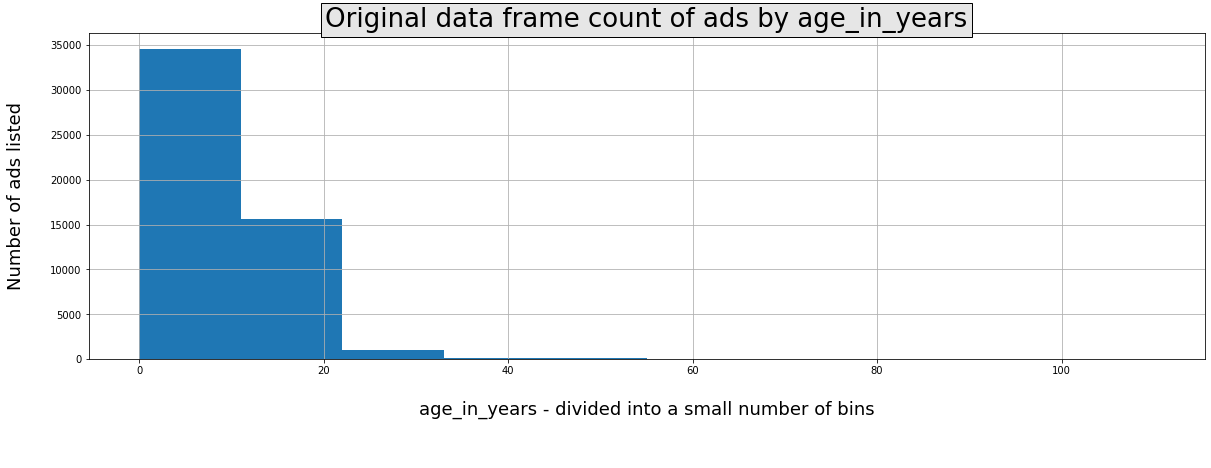

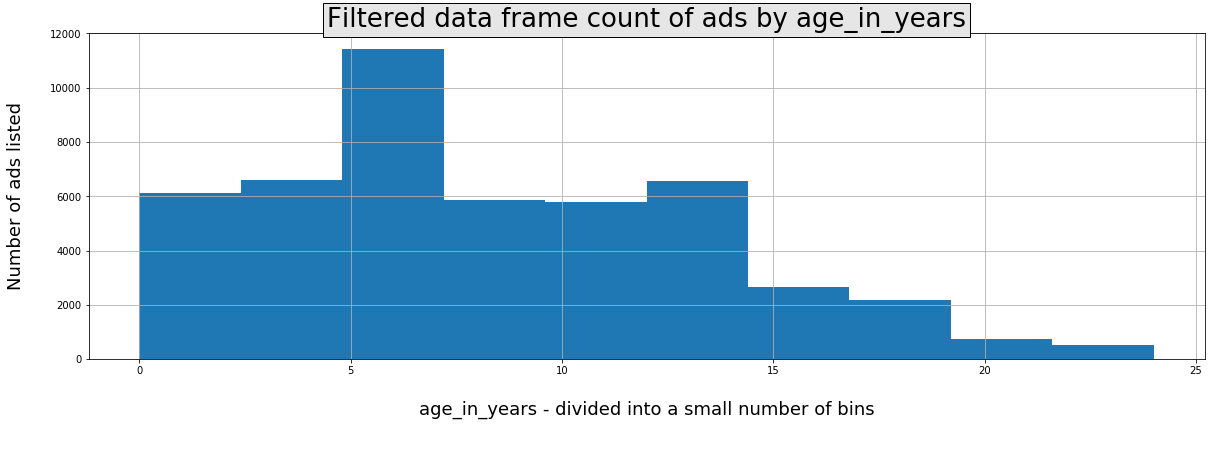

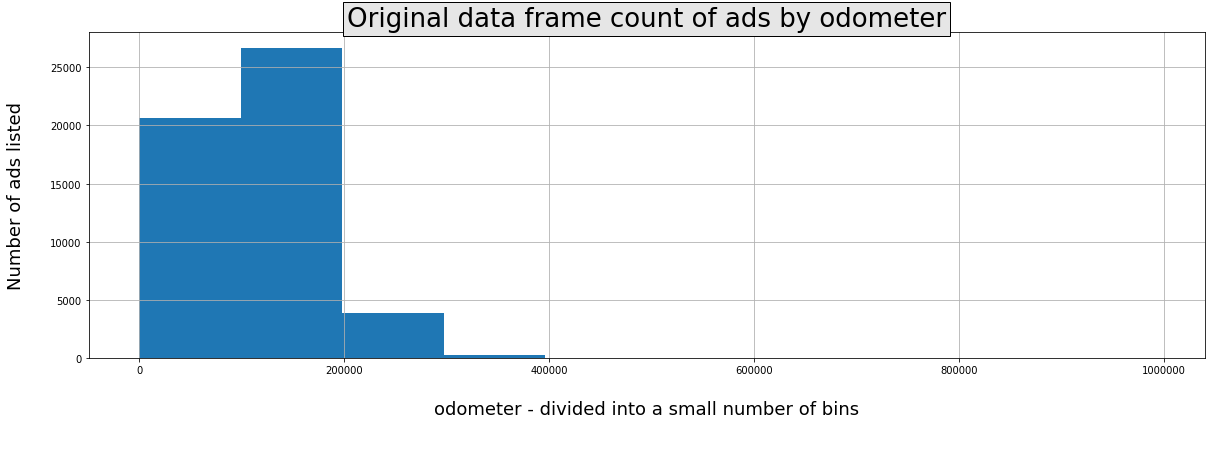

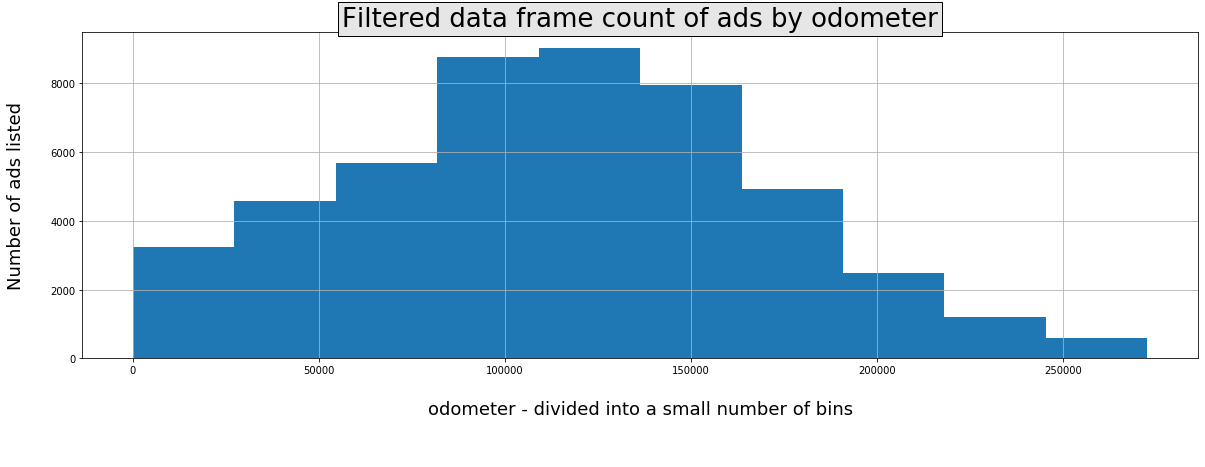

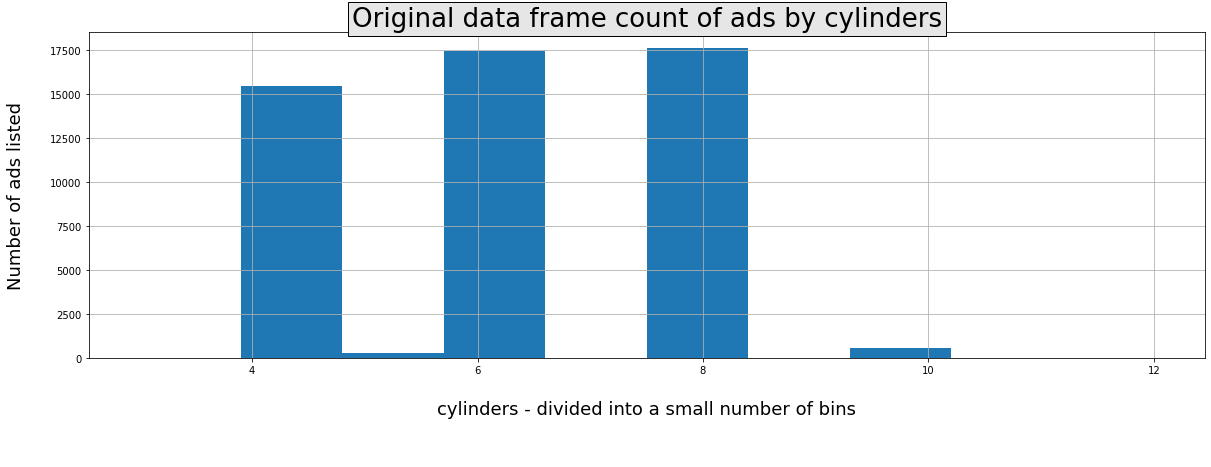

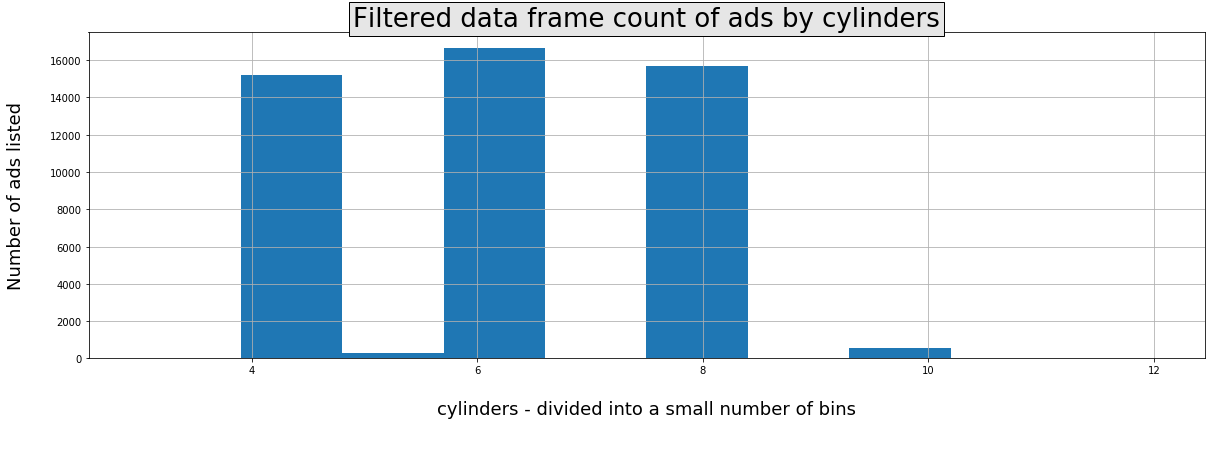

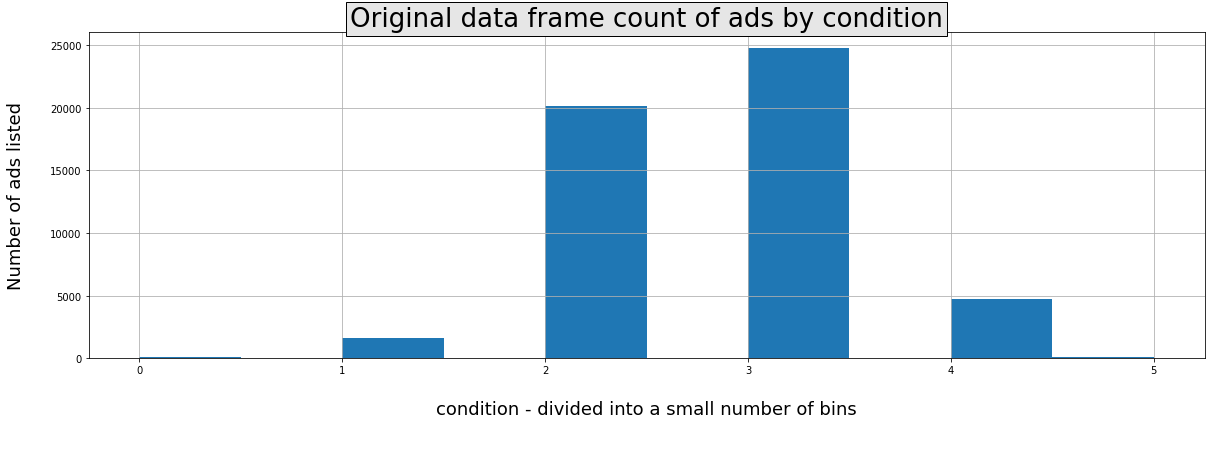

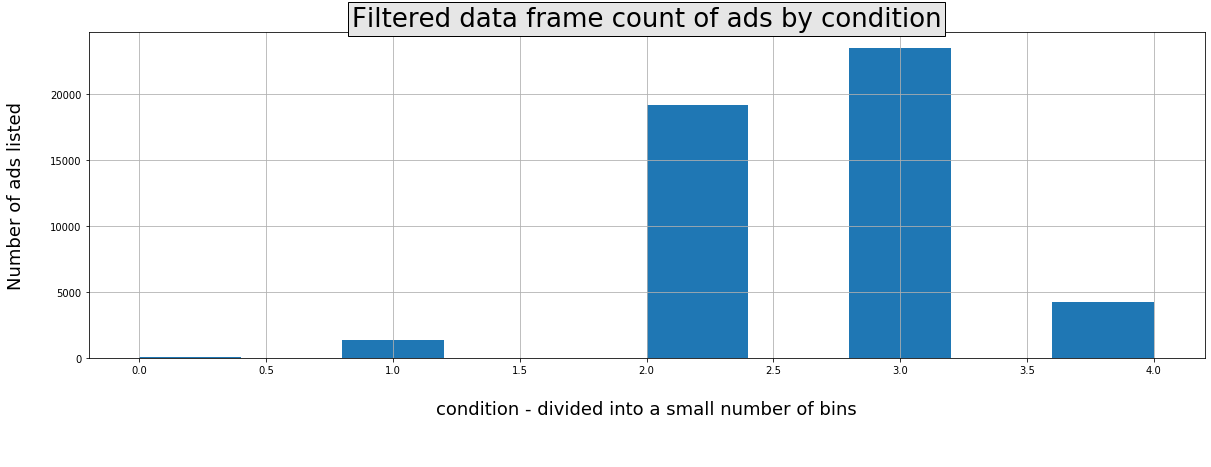

In [100]:
# create histograms to check out distribution of price, vehicle age, milage, cylinders
# compare the histograms of original data and filtered data


for column in columns_to_plot:
    # histogram of original df count
    df[[column]].hist(bins=10, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a small number of bins\n\n', fontsize=18)
    plt.title('Original data frame count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
    
    filtered_df[[column]].hist(bins=10, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a small number of bins\n\n', fontsize=18)
    plt.title('Filtered data frame count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
    
plt.show()

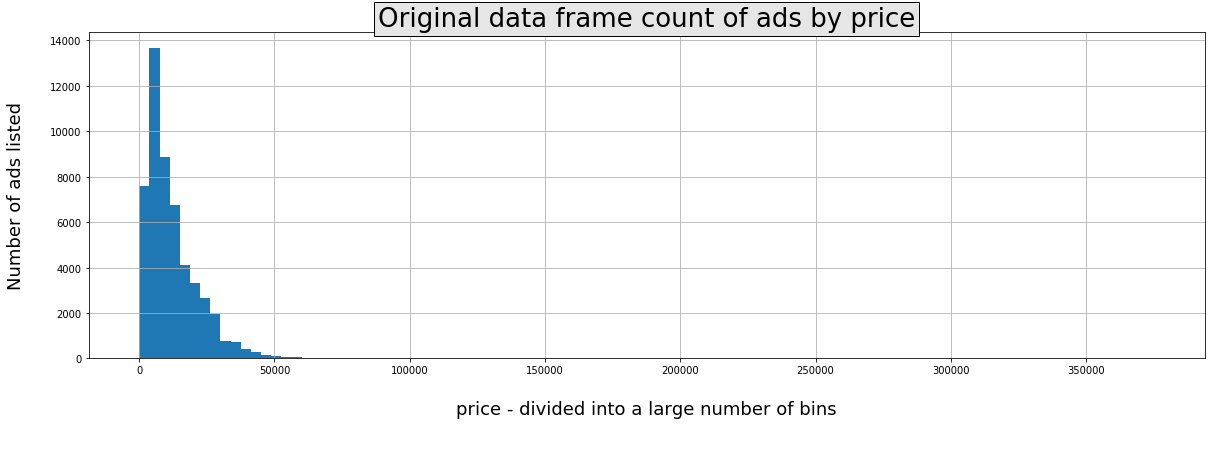

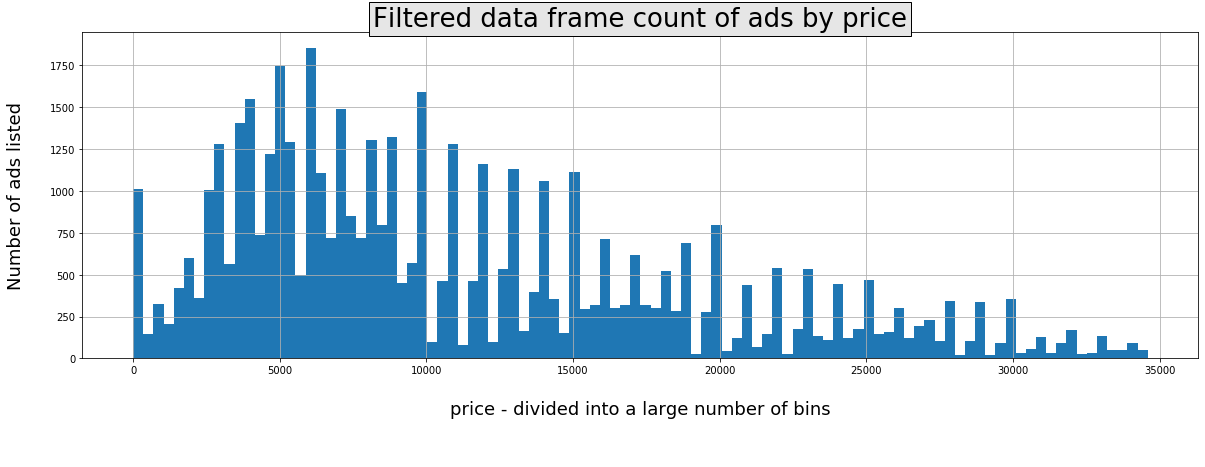

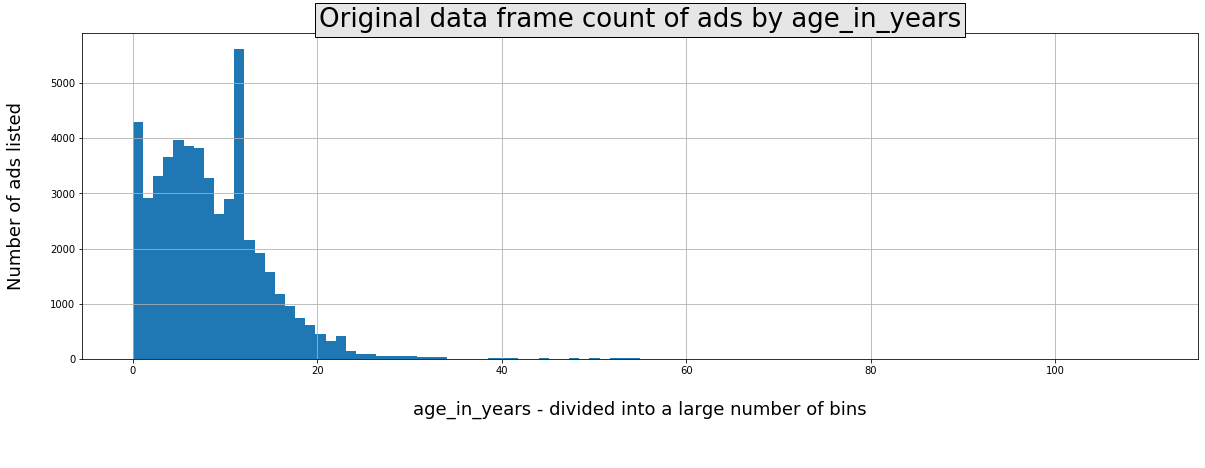

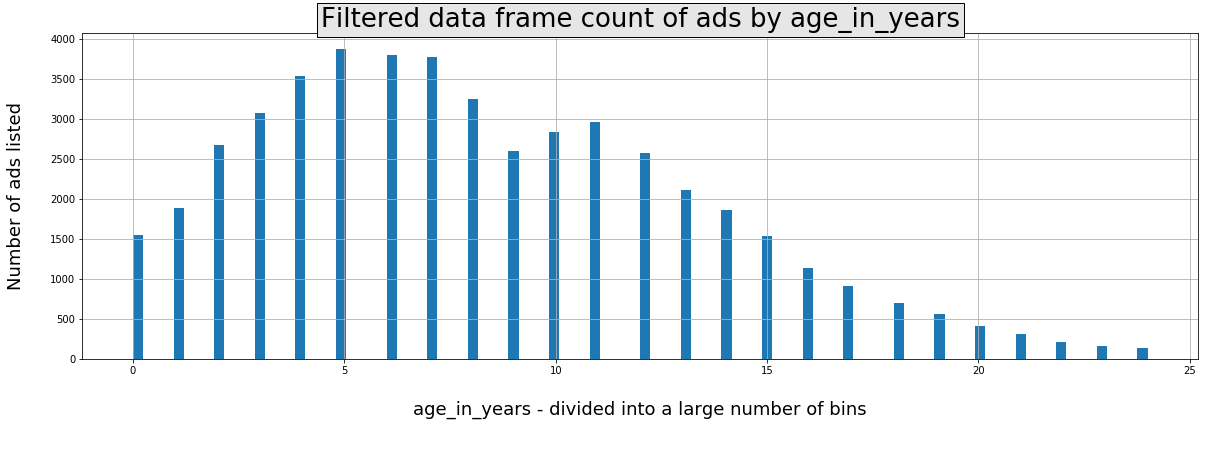

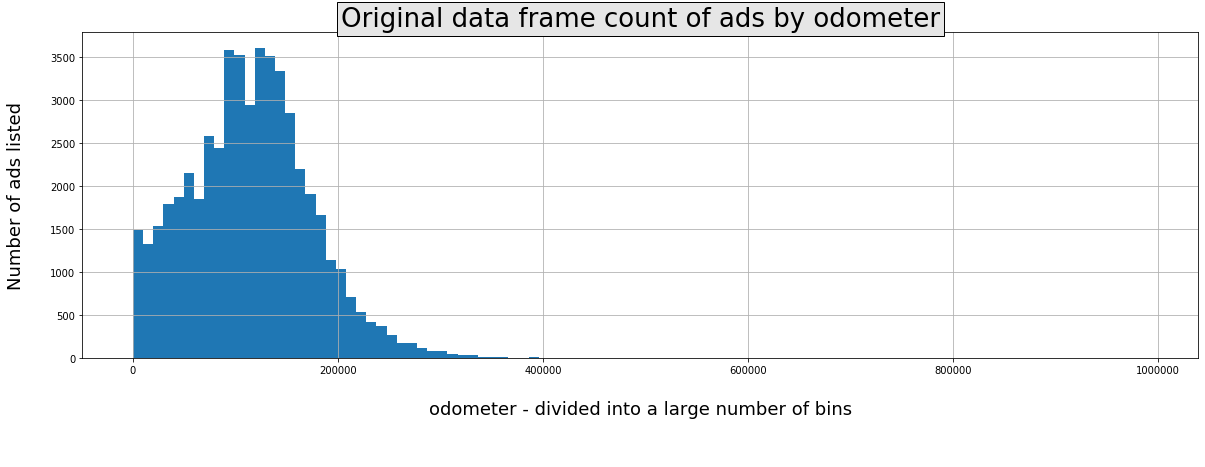

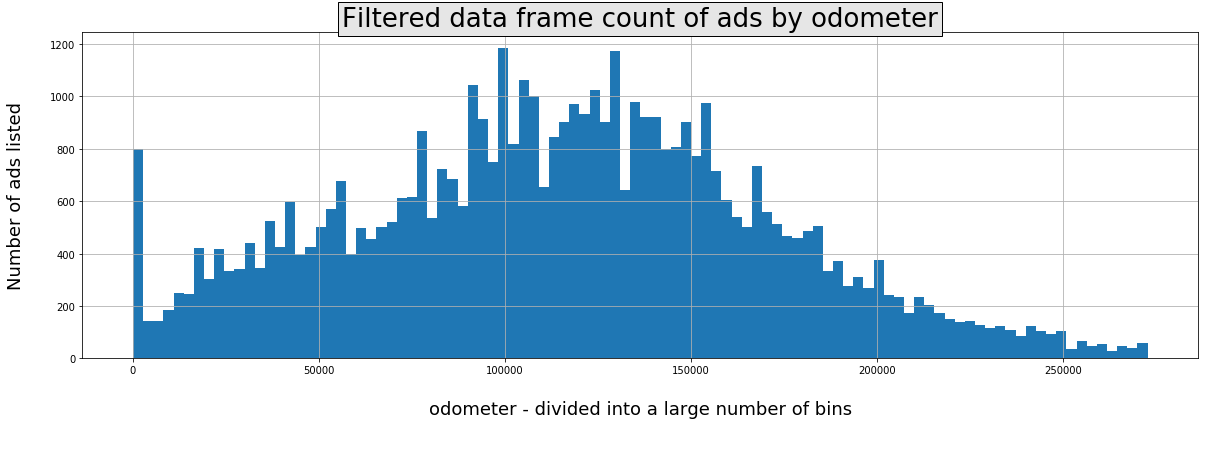

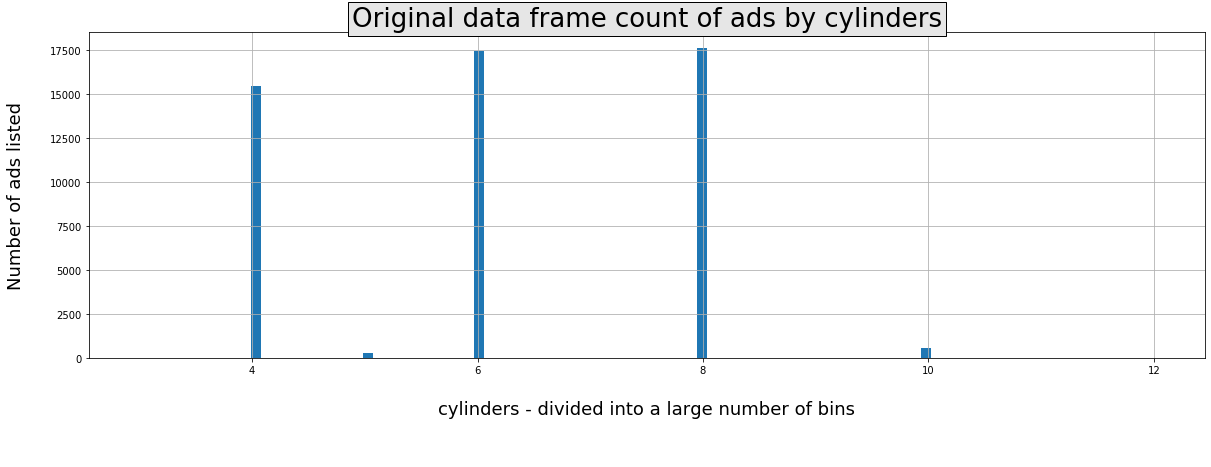

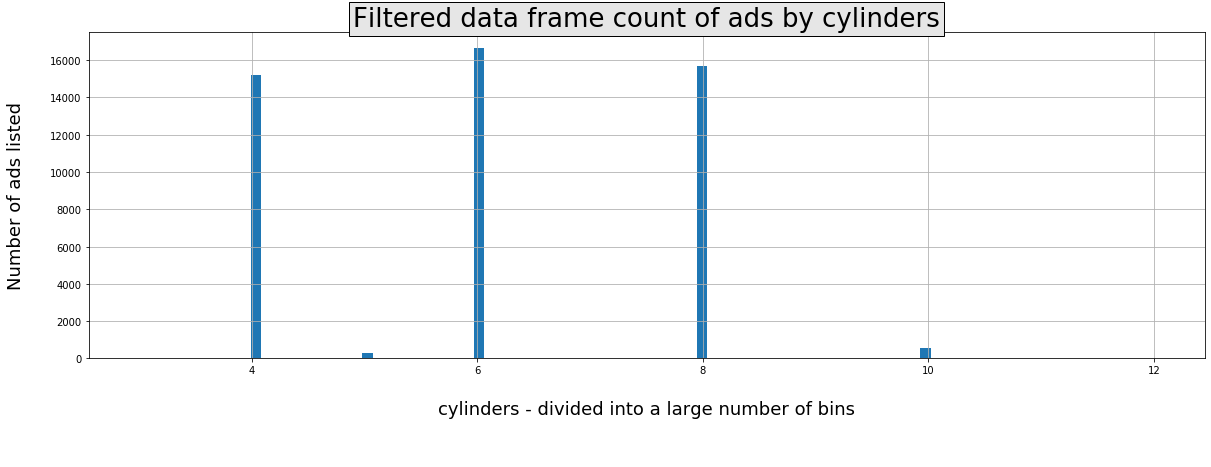

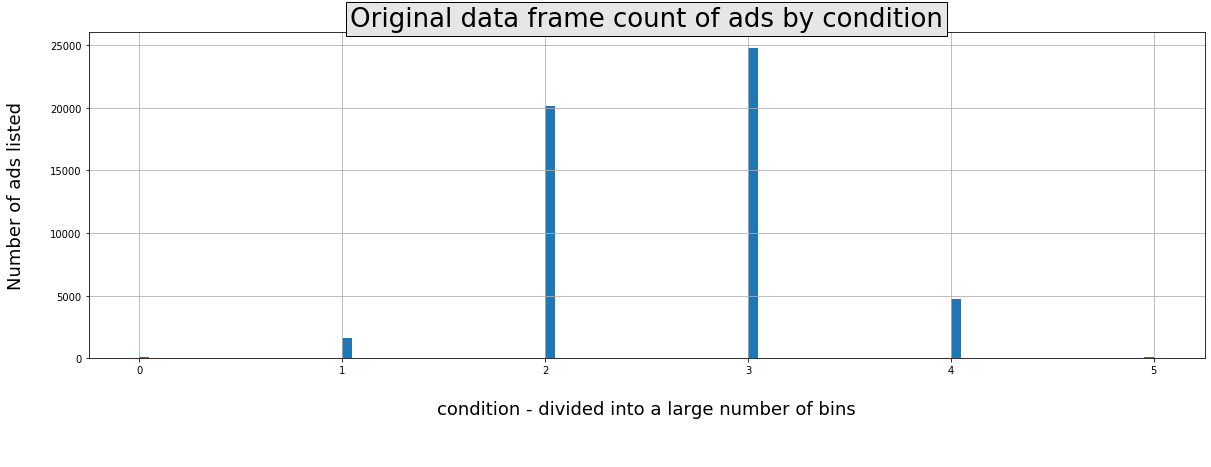

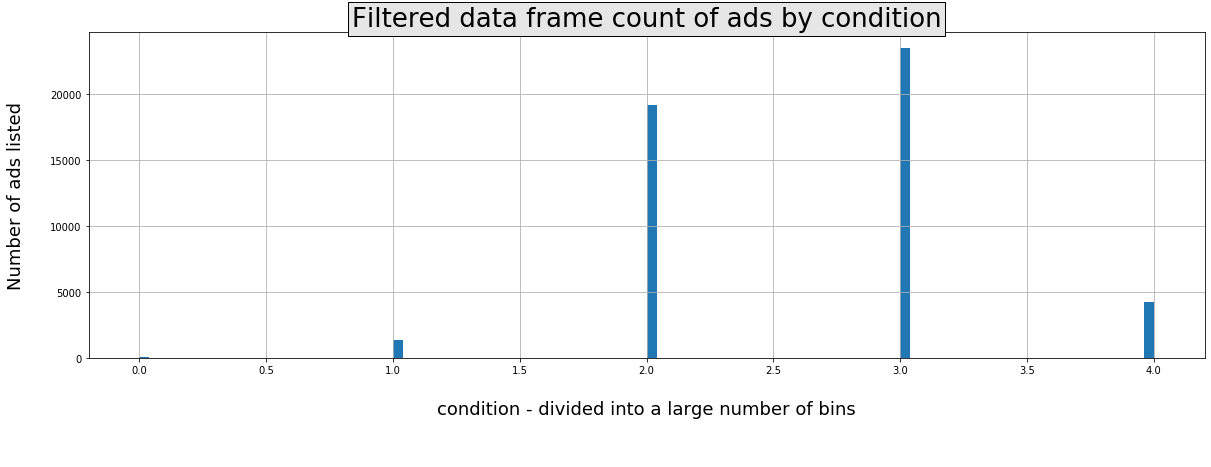

In [101]:
# create histograms to check out distribution of price, vehicle age, milage, cylinders
# compare the histograms of original data and filtered data


for column in columns_to_plot:
    # histogram of original df count
    df[[column]].hist(bins=100, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a large number of bins\n\n', fontsize=18)
    plt.title('Original data frame count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
    
    filtered_df[[column]].hist(bins=100, figsize=(20,6))
    plt.ylabel('Number of ads listed\n', fontsize=18)
    plt.xlabel('\n' + column + ' - divided into a large number of bins\n\n', fontsize=18)
    plt.title('Filtered data frame count of ads by ' + column, bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
    
plt.show()

It is far easier to gain understanding of the distribution of data once the outliers are removed, especially when using a large number of bins on a datatype with many unique values. 

Price demonstrates a more or less bell shaped distribution with a peak around 5 or 6 thousand dollars. age_in_years shows a peak around 7 to 8 years. The histogram of the filtered odometer data demonstrates a peak at 0 miles, suggesting close to 800 listings of new cars and also a larger peak around 100,000 to 130,000. The distribution of cylinders is very similar pre and post filtration, although 6 cyclinder became the most common listing post filtration versus 8 cylinder pre. And finally, the order of condition listed (3, 2, 4, 1, and 0) remained the same but the proportions differ slightly.

In [102]:
# statistics on filtered columns
filtered_columns_to_plot.describe()

,price,age_in_years,odometer,cylinders,condition
count,48465.000000,48465.000000,48465.000000,48465.000000,48465.000000
mean,11202.701888,8.271495,114953.264892,6.057237,2.629073
std,7817.693389,5.101572,55973.235705,1.656303,0.692107
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,4999.000000,4.000000,76518.000000,4.000000,2.000000
50%,8995.000000,8.000000,116231.000000,6.000000,3.000000
75%,15988.000000,12.000000,152381.000000,8.000000,3.000000
max,34595.000000,24.000000,272709.000000,12.000000,4.000000


In [103]:
# statistics for days_listed
print('Stats for days_listed\n')
print(filtered_df['days_listed'].describe())
print('\nMedian of days_listed:\t', filtered_df['days_listed'].mean().round(2))
print('Mean of days_listed:\t', filtered_df['days_listed'].median().round(2))

Stats for days_listed

count    48465.000000
mean        39.546167
std         28.222409
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Median of days_listed:	 39.55
Mean of days_listed:	 33.0


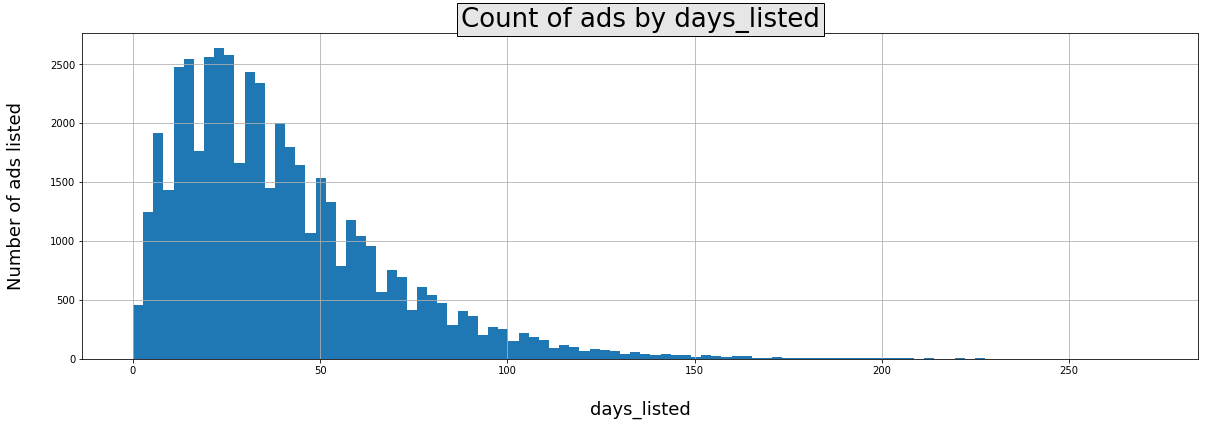

In [104]:
# create histogram for days_listed
filtered_df[['days_listed']].hist(bins=100, figsize=(20,6))
plt.ylabel('Number of ads listed\n', fontsize=18)
plt.xlabel('\ndays_listed', fontsize=18)
plt.title('Count of ads by days_listed', bbox={'facecolor':'0.9', 'pad':4}, fontsize=26)
plt.show()

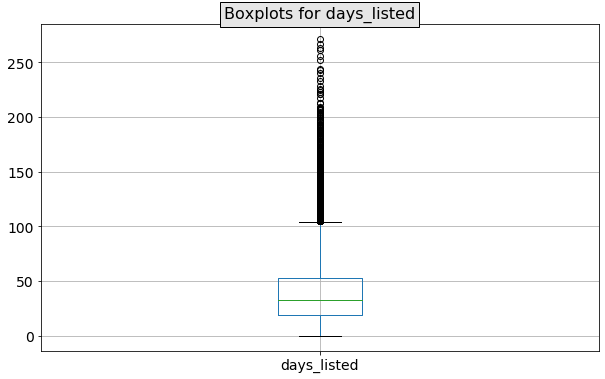

In [105]:
# use boxplots to demonstrate outliers of days_listed
filtered_df.boxplot('days_listed', figsize=(10,6), fontsize=14)
plt.title('Boxplots for days_listed', bbox={'facecolor':'0.9', 'pad':4}, fontsize=16)
plt.show()

The histogram and boxplot suggest any listings greater than approximately 110 days should be investigated as outliers. We can see the outliers are skewing the results (the mean is substantially higher than the median). 

The mean/average is 33 and the median is 39.55 so the average is 33 days. 

In [106]:
# investigate ads quickly removed
print('Stats for days_listed less than 1 day')
filtered_df.query('days_listed < 1').describe().round(2)

Stats for days_listed less than 1 day


,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
count,49.00,49.00,49.00,49.00,49.00,49.0,49.00,49.00,49.00,49.00,49.00
mean,10705.39,2008.96,2.61,6.12,121306.06,0.0,2.55,6.84,2018.24,9.29,16161.78
std,7324.97,5.16,0.79,1.70,61768.24,0.0,2.19,2.91,0.43,5.09,11272.25
min,500.00,1999.00,1.00,4.00,162.00,0.0,0.00,1.00,2018.00,0.00,20.00
25%,4999.00,2005.00,2.00,4.00,75465.00,0.0,1.00,5.00,2018.00,5.00,10283.00
50%,9950.00,2009.00,3.00,6.00,121000.00,0.0,2.00,7.00,2018.00,9.00,13500.00
75%,14995.00,2013.00,3.00,8.00,152600.00,0.0,4.00,9.00,2018.00,14.00,17857.00
max,29999.00,2018.00,4.00,10.00,250000.00,0.0,6.00,12.00,2019.00,19.00,72000.00


In [107]:
# investigate ads quickly removed
print('Stats for days_listed less than 2 da')
filtered_df.query('days_listed < 2').describe().round(2)

Stats for days_listed less than 2 da


,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
count,216.00,216.00,216.00,216.00,216.00,216.00,216.00,216.00,216.00,216.00,216.00
mean,11896.06,2010.33,2.66,5.99,110506.69,0.77,2.85,6.55,2018.34,8.01,18680.77
std,7920.81,5.25,0.74,1.66,56091.45,0.42,2.18,3.43,0.48,5.28,14307.79
min,1.00,1996.00,0.00,4.00,149.00,0.00,0.00,1.00,2018.00,0.00,16.00
25%,5573.00,2007.00,2.00,4.00,74621.50,1.00,1.00,3.00,2018.00,4.00,10892.25
50%,9925.00,2011.00,3.00,6.00,110575.00,1.00,3.00,7.00,2018.00,7.00,15488.00
75%,15922.50,2014.00,3.00,8.00,142491.00,1.00,5.00,9.00,2019.00,12.00,21277.75
max,32995.00,2019.00,4.00,10.00,250000.00,1.00,6.00,12.00,2019.00,22.00,100957.00


In [108]:
# investigate ads for filtered data
print('Statistics for filtered data')

filtered_df.describe().round(2)

Statistics for filtered data


,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
count,48465.00,48465.00,48465.00,48465.00,48465.00,48465.00,48465.0,48465.00,48465.00,48465.00,48465.00
mean,11202.70,2010.03,2.63,6.06,114953.26,39.55,3.0,6.63,2018.31,8.27,17703.21
std,7817.69,5.09,0.69,1.66,55973.24,28.22,2.0,3.47,0.46,5.10,11769.96
min,1.00,1994.00,0.00,3.00,0.00,0.00,0.0,1.00,2018.00,0.00,0.00
25%,4999.00,2007.00,2.00,4.00,76518.00,19.00,1.0,3.00,2018.00,4.00,11063.00
50%,8995.00,2011.00,3.00,6.00,116231.00,33.00,3.0,7.00,2018.00,8.00,15172.00
75%,15988.00,2014.00,3.00,8.00,152381.00,53.00,5.0,10.00,2019.00,12.00,21117.00
max,34595.00,2019.00,4.00,12.00,272709.00,271.00,6.0,12.00,2019.00,24.00,195700.00


49 ads were removed in less than 1 day and 216 total ads were removed in less than 2 days. The price and odometer statistics appear consistent with the df as a whole, so we are not sure if there is any general observation to be made.

In [109]:
# here we can filter by the outliers since the boxplot indicated a clear demarcation

# calculate outlier upper limits condition
Q1 = df['days_listed'].quantile(.25)
Q3 = df['days_listed'].quantile(.75)
IQR = Q3-Q1
upper_outlier_days_listed = Q3 + 1.5*IQR
print('Upper bound for days_listed:', upper_outlier_days_listed)

Upper bound for days_listed: 104.0


In [110]:
# investigate ads for upper outliers
print('Statistics for upper outliers (days_listed >104)')
filtered_df.query('days_listed > 104').describe().round(2)

Statistics for upper outliers (days_listed >104)


,price,model_year,condition,cylinders,odometer,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
count,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00,1518.00
mean,11042.48,2009.98,2.64,6.08,116149.40,128.58,3.01,6.48,2018.33,8.36,17370.81
std,7684.18,4.98,0.67,1.66,55031.17,24.63,2.00,3.50,0.47,4.98,10493.84
min,1.00,1994.00,0.00,3.00,0.00,105.00,0.00,1.00,2018.00,0.00,0.00
25%,5223.75,2007.00,2.00,4.00,78140.50,111.00,1.00,3.00,2018.00,5.00,10895.75
50%,8995.00,2011.00,3.00,6.00,119000.00,121.00,3.00,7.00,2018.00,8.00,15179.50
75%,14999.00,2014.00,3.00,8.00,152000.00,138.00,5.00,10.00,2019.00,11.00,21114.00
max,34490.00,2019.00,4.00,10.00,271175.00,271.00,6.00,12.00,2019.00,24.00,88175.00


There were a total of 1518 ads listed longer than the outlier threshold of 104. Again, the overall numbers in the median column are similar to the filtered_df dataframe so we are not sure if there is any reason these stand out. In a future data analysis, it may be worthwhile to run the numbers after removing the days_listed outliers.

In [111]:
# analyze the number of ads per type of vehicle
print('Type\tNumber_of_ads')
filtered_df['type'].value_counts()

Type	Number_of_ads


sedan          11995
SUV            11929
truck          11155
pickup          6336
coupe           2021
wagon           1506
mini-van        1145
hatchback       1004
van              583
convertible      351
other            234
offroad          183
bus               23
Name: type, dtype: int64

In [112]:
# examine average price per vehicle
vehicle_type_pivot = filtered_df.pivot_table(index='type', values=('price'), aggfunc='mean').sort_values(by='price', ascending=False)
print('Average price per vehicle type:\n')
print(vehicle_type_pivot.round(2))

Average price per vehicle type:

                price
type                 
bus          17445.91
truck        15088.38
pickup       14986.39
offroad      14292.99
coupe        13454.23
convertible  12851.38
other        10456.96
SUV          10426.28
wagon         8975.52
van           8819.23
mini-van      8029.62
sedan         6955.35
hatchback     6824.10


The type of vehicles with the higest average price are bus and trucks, but there only 23 buses listed.

Sedans and SUV's have the most ads per vehicle at close to 12000 each. 

In [113]:
# create a df of vehicle type and counts
# ref: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

value_counts = filtered_df['type'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['type', 'counts'] 
df_value_counts_reset

,type,counts
0,sedan,11995
1,SUV,11929
2,truck,11155
3,pickup,6336
4,coupe,2021
5,wagon,1506
6,mini-van,1145
7,hatchback,1004
8,van,583
9,convertible,351


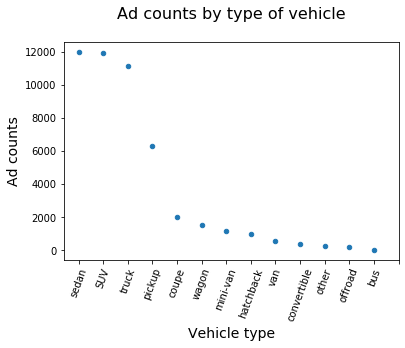

In [114]:
# create a scatterplot to look for number of ads per type of vehicle

df_value_counts_reset.reset_index().plot(kind='scatter', x='index', y='counts')
plt.title('Ad counts by type of vehicle\n', fontsize=16)
plt.ylabel('Ad counts', fontsize=14)
plt.xlabel('Vehicle type', fontsize=14)

# Set text labels and properties.
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], \
           ['sedan', 'SUV', 'truck', 'pickup', 'coupe', 'wagon',\
            'mini-van', 'hatchback', 'van', 'convertible', 'other', 'offroad', 'bus'], \
           rotation=70)
plt.show()

In [115]:
# assess for linear relationship
print('Correlative relationship between vehicle type (represented by index)\n\
and ad counts per vehicle type:')
df_value_counts_reset.reset_index().corr()

Correlative relationship between vehicle type (represented by index)
and ad counts per vehicle type:


,index,counts
index,1.00000,-0.86746
counts,-0.86746,1.00000


The scatterplot of ad counts by type of vehicle does suggest linear relationship. We verified the correlation by checking the corr() function and found the value close to -1 (-0.86746).

Finally, we will examine if age, milage, condition, transmission, or color have an affect on the price of sedans or SUVs (the 2 most popular types of vehicles judged by ad count).

In [116]:
# create a df with just the top 2 vehicles by ad count
print('Info on df with just top 2 vehicles')
top2 = filtered_df[filtered_df.type.isin(['sedan', 'SUV'])]
print(top2['type'].value_counts())
top2.head()

Info on df with just top 2 vehicles
sedan          11995
SUV            11929
wagon              0
van                0
truck              0
pickup             0
other              0
offroad            0
mini-van           0
hatchback          0
coupe              0
convertible        0
bus                0
Name: type, dtype: int64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_in_years,avg_yearly_miles
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404


In [117]:
# check for any categories with less than 50 entries

print('Check for categories with less than 50 entries\n\
in categorical columns for df with both sedan and SUV types')

print('\nDistribution of condition')
print(top2['condition'].value_counts().sort_index())

print('\nDistribution of transmission')
print(top2['transmission'].value_counts().sort_index())

print('\nDistribution of paint_color')
print(top2['paint_color'].value_counts().sort_index())


Check for categories with less than 50 entries
in categorical columns for df with both sedan and SUV types

Distribution of condition
0       58
1      566
2     8463
3    12435
4     2402
Name: condition, dtype: int64

Distribution of transmission
automatic    22589
manual        1045
other          290
Name: transmission, dtype: int64

Distribution of paint_color
black      3855
blue       2232
brown       611
custom      590
green       627
grey       2756
orange       90
purple       63
red        1808
silver     3564
unknown    4301
white      3361
yellow       66
Name: paint_color, dtype: int64


When using a combined df of sedan and SUV vehicles, there are no categories with less than 50 entries per category. This may be different if we calculate categories for either sedan or SUV singularly.

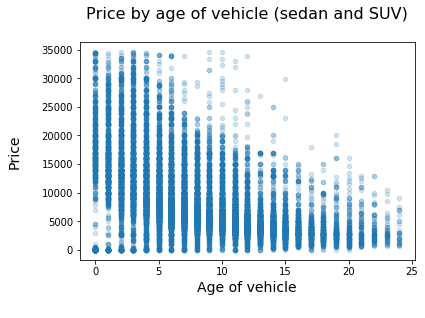

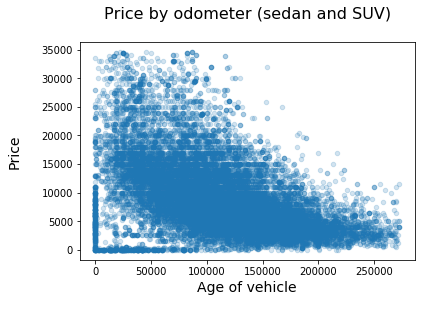

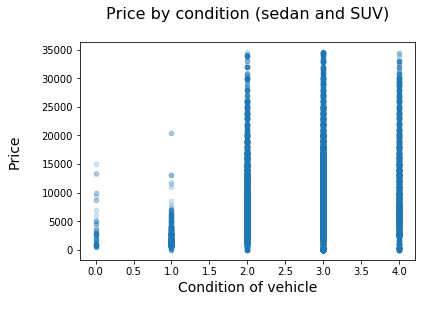

In [118]:
# top2 vehicles and age_in_years
top2.plot(kind='scatter', x='age_in_years', y='price', alpha=0.2)
plt.title('Price by age of vehicle (sedan and SUV)\n', fontsize=16)
plt.ylabel('Price\n', fontsize=14)
plt.xlabel('Age of vehicle\n', fontsize=14)
plt.show()

# top2 vehicles and odometer
top2.plot(kind='scatter', x='odometer', y='price', alpha=0.2)
plt.title('Price by odometer (sedan and SUV)\n', fontsize=16)
plt.ylabel('Price\n', fontsize=14)
plt.xlabel('Age of vehicle\n', fontsize=14)
plt.show()

# top2 vehicles and condition
top2.plot(kind='scatter', x='condition', y='price', alpha=0.2)
plt.title('Price by condition (sedan and SUV)\n', fontsize=16)
plt.ylabel('Price\n', fontsize=14)
plt.xlabel('Condition of vehicle\n', fontsize=14)
plt.show()

Both scatterplots of age of vehicle and odometer by df of sedan and SUV show a general curve suggesting a linear relationship. This aligns with common sense because we expect price to decrease as milage and the age of the vehicle increase. The condition may be better evaluated using a boxplot.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


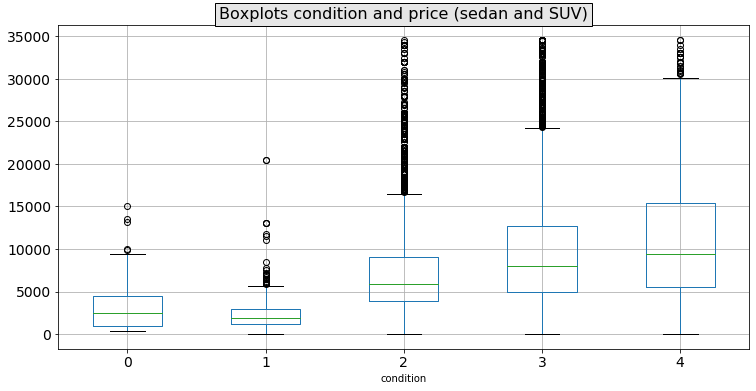

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


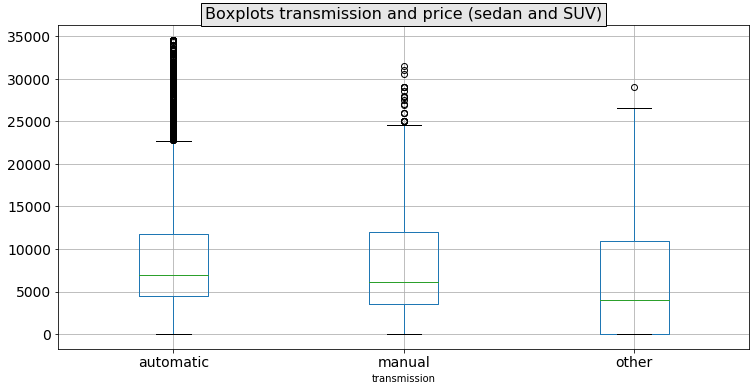

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


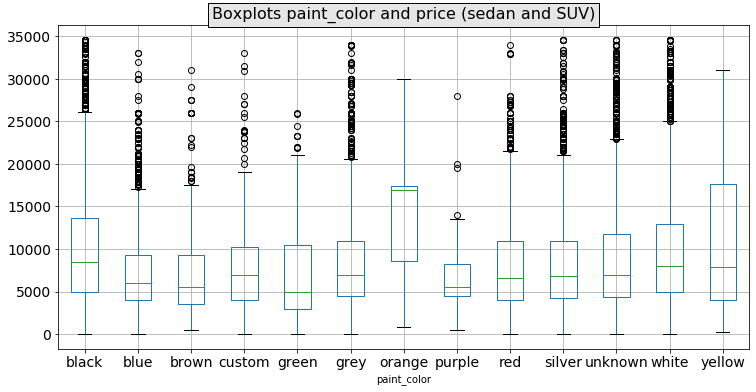

In [119]:
# top2 vehicles and condition boxplot

top2.boxplot(by='condition', column='price', figsize=(12,6), fontsize=14)
plt.title('Boxplots condition and price (sedan and SUV)', bbox={'facecolor':'0.9', 'pad':4}, fontsize=16)
plt.suptitle("")
plt.show()

# top2 vehicles and transmission boxplot

top2.boxplot(by='transmission', column='price', figsize=(12,6), fontsize=14)
plt.title('Boxplots transmission and price (sedan and SUV)', bbox={'facecolor':'0.9', 'pad':4}, fontsize=16)
plt.suptitle("")
plt.show()

# top2 vehicles and paint_color boxplot

top2.boxplot(by='paint_color', column='price', figsize=(12,6), fontsize=14)
plt.title('Boxplots paint_color and price (sedan and SUV)', bbox={'facecolor':'0.9', 'pad':4}, fontsize=16)
plt.suptitle("")
plt.show()

While these boxplots throw warnings, we researched and discovered it is likely related to a mismatch of versions https://stackoverflow.com/questions/65195888/warning-when-creating-boxplot-with-nans-in-pandas.

In [120]:
# check correlations between price
print('Correlation table for sedan and SUV dataframe')
top2[['price', 'age_in_years', 'odometer', 'condition', 'transmission', 'paint_color']].corr()


Correlation table for sedan and SUV dataframe


,price,age_in_years,odometer,condition
price,1.000000,-0.520954,-0.467451,0.251192
age_in_years,-0.520954,1.000000,0.632996,-0.324583
odometer,-0.467451,0.632996,1.000000,-0.339295
condition,0.251192,-0.324583,-0.339295,1.000000


Within this slice of the dataframe (considering only sedans and SUVs), we note a semi-strong relationship between odometer and age_in_years (to be expected) as well as age_in years and price. Surprisingly, the relationship between condition and price appears less robust. Might this be because we eliminated the "best" category when removing outliers? However, it is evident from the box and whisker's plot that as condition improves, cost goes up.

It appears that there are stong relationships between color, transmission, and price for a df of sedans and SUVs. However, we will verify by creating correlation tables with the index like we did when exploring vehicle types and counts:

In [121]:
# create a df of paint_color
# ref: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

value_counts = top2['paint_color'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['paint_color', 'counts'] 
df_value_counts_reset

# assess for linear relationship
print('Correlative relationship between paint_color and and price \
for a dataframe with only sedans and SUVs.')
df_value_counts_reset.reset_index().corr()

Correlative relationship between paint_color and and price for a dataframe with only sedans and SUVs.


,index,counts
index,1.000000,-0.975861
counts,-0.975861,1.000000


In [122]:
# create a df of vehicle transmission
# ref: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe

value_counts = top2['transmission'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['transmission', 'counts'] 
df_value_counts_reset

# assess for linear relationship
print('Correlative relationship between transmission and and price \
for a dataframe with only sedans and SUVs.')
df_value_counts_reset.reset_index().corr()

Correlative relationship between transmission and and price for a dataframe with only sedans and SUVs.


,index,counts
index,1.000000,-0.880547
counts,-0.880547,1.000000


Through correlative tables, we were able to show that there is a strong relationship between price and paint_color and price and transmission for the dataframe containing only sedans and SUVs.

<a class="anchor" id="exploratory_data_analysis_conclusion"></a>
### Exploratory data analysis conclusion

We noted the strong effect of outliers on price, vehicle's age when ad placed, mileage, cylinders, and condition. These outliers diminished the ability to interpret the histograms. Outliers were calculated and removed. New historgrams were created that clearly show a better distribution of values. We created 2 new dataframes, one with filtered data and one with only the outliers. We used the filtered_df to work the remainder of the project.

A typical ad lasts just over a month. Many lasted less than a day and there were over 1500 ads listed longer than the upper threshold.

We found that sedans and SUVs had the greatest number of ads and that there was a relationship between vehicle type and ad count across all vehicle types.

When we examined a slice of the df with only sedans and SUVs, we discovered odometer, age_in_years, paint color, and transmission have a strong correlation with sedans/SUV price. Condition demonstrated a fair correlation with price, but we suspect eliminating the higher category of quality might have influenced the statistics for condition since it only had 6 categories in the beginning. We did check for any parameter with less than 50 ads, but all the categories had more than 50 entities. Perhaps if we had analyzed sedans separately and SUVs separately, we would have eliminated some parameters.

Future paths:  

This is just a gentle start to analyzing all the possible factors that influence price. We didn't even consider the interactions of how long the ad ran for, the month the ad was listed, nor the many other types of vehicles and factors that might have influenced their price.

Minor things to consider in the future include removing the 2 values for 12 cylinders and seeing how that affects relationships, even though they were beneath the outlier threshold. Also, we could return the high condition value and see how that affects the correlations.

[Return to table of contents](#table_of_contents)

<a class="anchor" id="conclusion"></a>
## Overall conclusion

As an anlalyst at Crankshaft List, a vehicle ad site, we know hundreds of ads are published every day. By investigating the two recent years of listings (2018 and 2019), we have determined factors that influence the price of two of the most listed vehicles, sedans along with SUVs: vehicle's age when ad placed, mileage, transmission, paint_color, and, to a lesser extent, condition. We would expect vehicle's age and milage to factor into price. People appear to prefer automatic transmission over manual. Paint color and condition also influence price.

To arrive at our conclusions we first loaded and inspected the data. Preprocessing included finding and filling in missing values as appropriate, change data types as appropriate and look for anamolies/outliers. Calculations involved adding additional columns for adding time and assigning condition to a numeric scale.

During our narrow analysis, we focused on the 2 most listed vehicles and a small subsection of variables (vehicle's age when ad placed, mileage, transmission, paint_color, and, condition) to determine influence on price. We did discover all 5 of the studied variables influenced price, as stated above.

Future paths:

This is just a narrow start to analyzing this dataset and all the possible factors that influence price. We didn't even consider the interactions of how long the ad ran for, the month the ad was listed, nor the many other types of vehicles and factors that might have influenced the price.

[Return to table of contents](#table_of_contents)